## Importacion de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer


from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder


import sys
import os

import random
import json

from pandas import json_normalize

from scipy import stats
from datetime import datetime
from sklearn import model_selection

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import data

In [2]:
df = pd.read_csv("/kaggle/input/sample-mmp/sample_mmp.csv", low_memory=False)


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.head()

MachineIdentifier   ProductName EngineVersion  \
0  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    46781.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    47238.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           19951.0                           0   
1                           48753.0                           0   
2                           33111.0                           1   
3                           48473.0                           1   
4                            4343.0                           1   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      0.0                     0.0                      0   
2                      0.0                     0.0                      1   
3                      NaN                     0.0                      0   
4                      NaN                     0.0                      1   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           1.0   
2                    1                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                  11.0             1  
1                   3.0             0  
2                  15.0             0  
3                  15.0             1  
4                  13.0             1  

[5 rows x 83 columns]

## MLC2 Data Understanding

### Tamaño dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int64  
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  int64  
 8   DefaultBrowsersIdentifier                          24061 non-null   float6

In [6]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(36), int64(17), object(30)
memory usage: 316.6+ MB


In [7]:
df.shape

(500000, 83)

In [8]:
df.describe(include = 'all').T

count  unique  \
MachineIdentifier                          500000  500000   
ProductName                                500000       3   
EngineVersion                              500000      53   
AppVersion                                 500000      95   
AvSigVersion                               500000    6455   
...                                           ...     ...   
Census_IsPenCapable                      500000.0     NaN   
Census_IsAlwaysOnAlwaysConnectedCapable  495960.0     NaN   
Wdft_IsGamer                             483050.0     NaN   
Wdft_RegionIdentifier                    483050.0     NaN   
HasDetections                            500000.0     NaN   

                                                                      top  \
MachineIdentifier                        f1cd864e97bae82bdf96523e1a539121   
ProductName                                                  win8defender   
EngineVersion                                                 1.1.15200.1   
AppVersion                                                4.18.1807.18075   
AvSigVersion                                                 1.273.1420.0   
...                                                                   ...   
Census_IsPenCapable                                                   NaN   
Census_IsAlwaysOnAlwaysConnectedCapable                               NaN   
Wdft_IsGamer                                                          NaN   
Wdft_RegionIdentifier                                                 NaN   
HasDetections                                                         NaN   

                                           freq      mean       std  min  25%  \
MachineIdentifier                             1       NaN       NaN  NaN  NaN   
ProductName                              494604       NaN       NaN  NaN  NaN   
EngineVersion                            216491       NaN       NaN  NaN  NaN   
AppVersion                               288809       NaN       NaN  NaN  NaN   
AvSigVersion                               5771       NaN       NaN  NaN  NaN   
...                                         ...       ...       ...  ...  ...   
Census_IsPenCapable                         NaN  0.037744  0.190577  0.0  0.0   
Census_IsAlwaysOnAlwaysConnectedCapable     NaN  0.057245   0.23231  0.0  0.0   
Wdft_IsGamer                                NaN   0.28406  0.450966  0.0  0.0   
Wdft_RegionIdentifier                       NaN  7.888577  4.551764  1.0  3.0   
HasDetections                               NaN  0.499906       0.5  0.0  0.0   

                                          50%   75%   max  
MachineIdentifier                         NaN   NaN   NaN  
ProductName                               NaN   NaN   NaN  
EngineVersion                             NaN   NaN   NaN  
AppVersion                                NaN   NaN   NaN  
AvSigVersion                              NaN   NaN   NaN  
...                                       ...   ...   ...  
Census_IsPenCapable                       0.0   0.0   1.0  
Census_IsAlwaysOnAlwaysConnectedCapable   0.0   0.0   1.0  
Wdft_IsGamer                              0.0   1.0   1.0  
Wdft_RegionIdentifier                    10.0  11.0  15.0  
HasDetections                             0.0   1.0   1.0  

[83 rows x 11 columns]

In [9]:
#Definimos nuestra variable TARGET
TARGET = 'HasDetections'

In [10]:
df.head()

MachineIdentifier   ProductName EngineVersion  \
0  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    46781.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    47238.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           19951.0                           0   
1                           48753.0                           0   
2                           33111.0                           1   
3                           48473.0                           1   
4                            4343.0                           1   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      0.0                     0.0                      0   
2                      0.0                     0.0                      1   
3                      NaN                     0.0                      0   
4                      NaN                     0.0                      1   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           1.0   
2                    1                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                  11.0             1  
1                   3.0             0  
2                  15.0             0  
3                  15.0             1  
4                  13.0             1  

[5 rows x 83 columns]

## Analisis Numerico/Categorico/Boolean

## Analisis del target

In [11]:
TARGET

'HasDetections'

In [12]:
df[TARGET].describe()

count    500000.000000
mean          0.499906
std           0.500000
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HasDetections, dtype: float64

In [13]:
df[TARGET].value_counts()

HasDetections
0    250047
1    249953
Name: count, dtype: int64

In [14]:
df[TARGET].isnull().value_counts()

HasDetections
False    500000
Name: count, dtype: int64

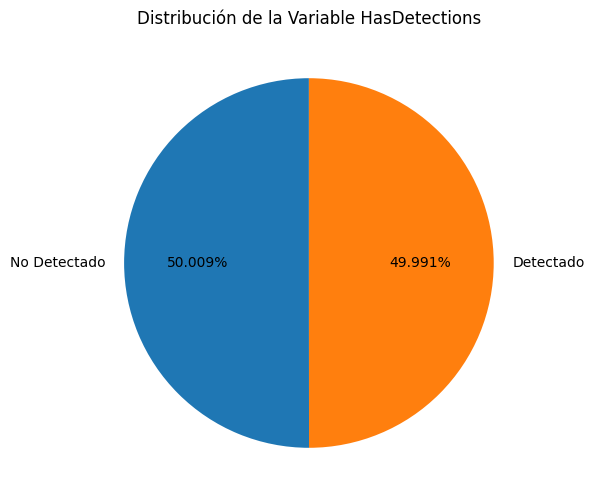

In [15]:
target_counts = df[TARGET].value_counts()
target_counts.plot(kind='pie', figsize=(8, 6), labels=['No Detectado', 'Detectado'], autopct='%1.3f%%', startangle=90)
plt.title(f'Distribución de la Variable {TARGET}')
plt.ylabel('')  # Hide y-label
plt.show()

<Axes: xlabel='HasDetections', ylabel='count'>

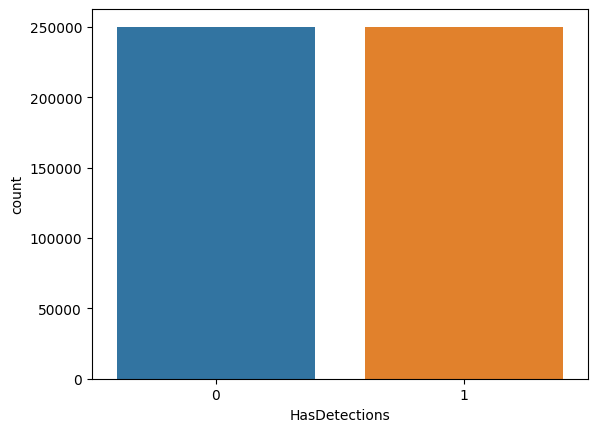

In [16]:
sns.countplot(x='HasDetections',data=df)

In [17]:
# Podemos observar que tenemos un target balanceado

### EDA - Variables categoricas

In [18]:
#funcion que extraia las variables en categoricas y numericas. En este caso el dataset no tiene variables booleanas.
def create_lists(dataframe):

    lnum = []
    lcat = []

    for column, dtype in dataframe.dtypes.items():
        if dtype == 'float64' or dtype == 'int64':
            lnum.append(column)
        elif dtype == 'object':
            lcat.append(column)
    return lnum, lcat


In [19]:
#Se analizara por separado mediante EDA las variables categoricas y numericas, centrandonos en las variables mas representativas.

In [20]:
def plot_detection_rate_dual_axis(df, feature, target='HasDetections', top_n=5):
    # Agrupamos la variable y hacemos las operaciones
    grouped_data = df.groupby(feature).agg({
        target: ['count', 'mean']  # Numero de ocurrencias y calculo de la media de la variable target
    }).sort_values(by=(target, 'count'), ascending=False).head(top_n)  # Limitando en un numero N (top) variables
    grouped_data.columns = [f'{target}_count', f'{target}_mean']

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.bar(grouped_data.index, grouped_data[f'{target}_count'], color='blue', alpha=0.6, label=f'{target} Count')
    ax1.set_xlabel(feature)
    ax1.set_ylabel(f'{target} Count', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(grouped_data.index, grouped_data[f'{target}_mean'], color='orange', marker='o', linestyle='-', linewidth=2, label=f'Mean {target}')
    ax2.set_ylabel(f'Mean {target}', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    # titulo de la grafica
    plt.title(f'{feature}: {target} Frecuencia vs. Media {target}')
    fig.tight_layout()
    plt.show()

In [21]:
def plot_scaled_stacked_bar_chart(df, feature, target='HasDetections'):

    # Agrupamos los datos de la variable 'feature' y target, realizamos conteo de ocurrencias
    grouped_data = df.groupby([feature, target]).size().unstack().fillna(0)
    # Calculamos la suma de la fila
    grouped_data['total'] = grouped_data.sum(axis=1)
    # Convertimos el total en porcentajes
    grouped_data_percentage = grouped_data.div(grouped_data['total'], axis=0) * 100
    # Borramos la columna'total' , no es necesaria para el grafico
    grouped_data_percentage.drop('total', axis=1, inplace=True)

    ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'], alpha=0.7)
    # etiquetas y titulo
    plt.xlabel(feature)
    plt.ylabel('Porcentaje (%)')
    plt.title(f'Escalado {target} by {feature}')
    plt.xticks(rotation=45)
    plt.legend(title=target, labels=['Not Detected', 'Detected'])
    # Show the plot
    plt.tight_layout()
    plt.show()

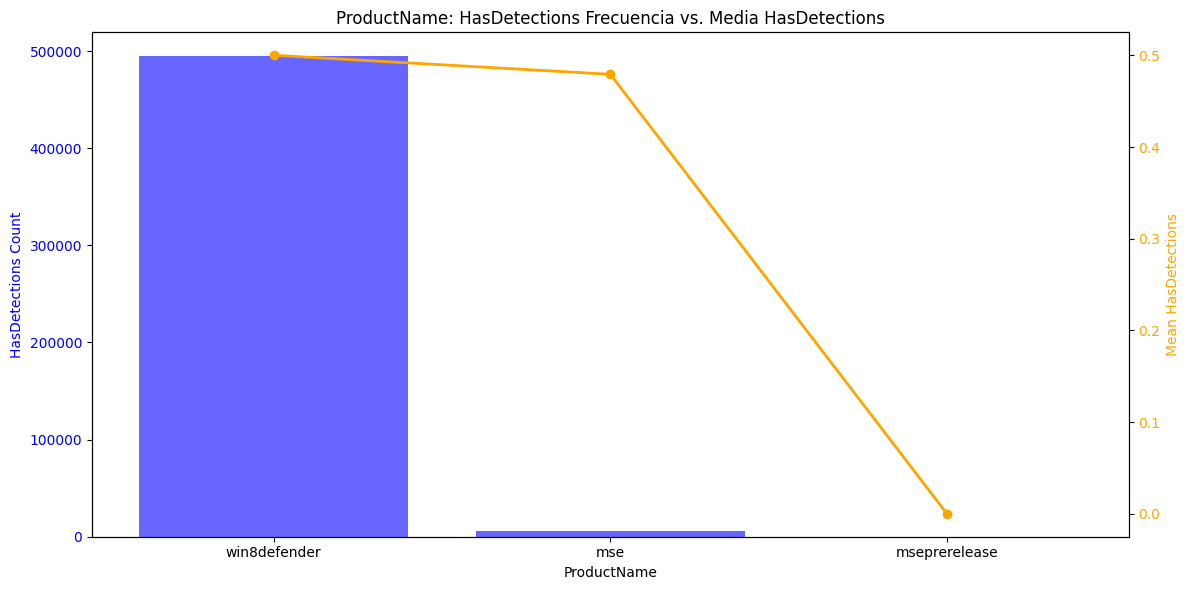

In [22]:
plot_detection_rate_dual_axis(df, 'ProductName', target='HasDetections', top_n=5)

In [23]:
# El producto mas predominante es el win8defender y que tiene un mayor numero de HasDetections a 1.

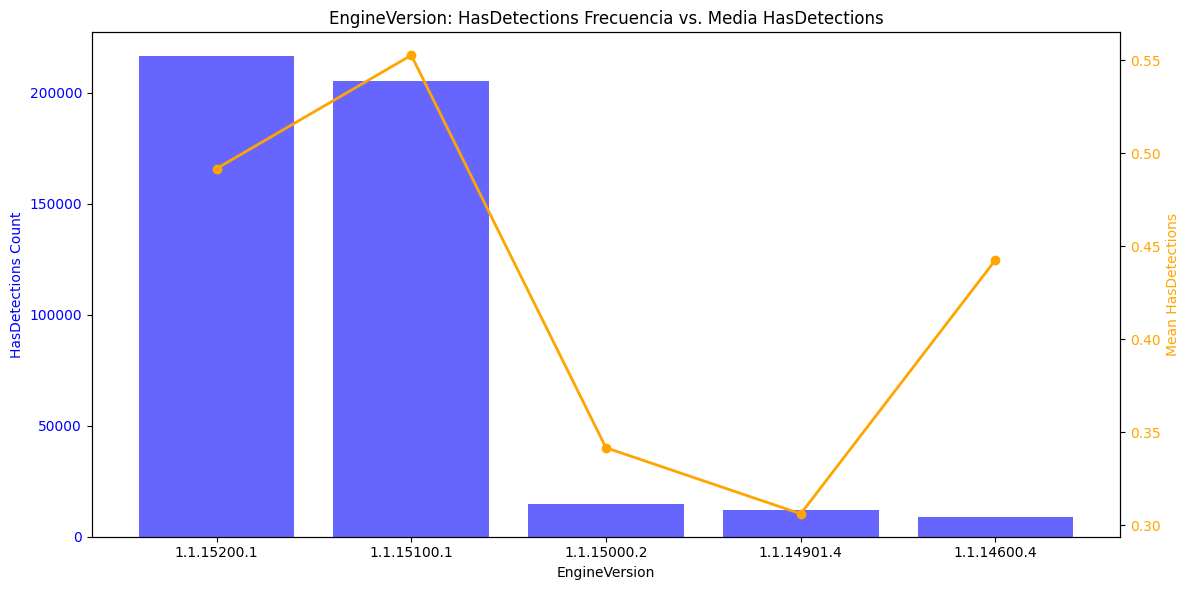

In [24]:
plot_detection_rate_dual_axis(df, 'EngineVersion', target='HasDetections', top_n=5)

In [25]:
#Hay grandes diferencias entre la version de EngineVersion que se utilice.

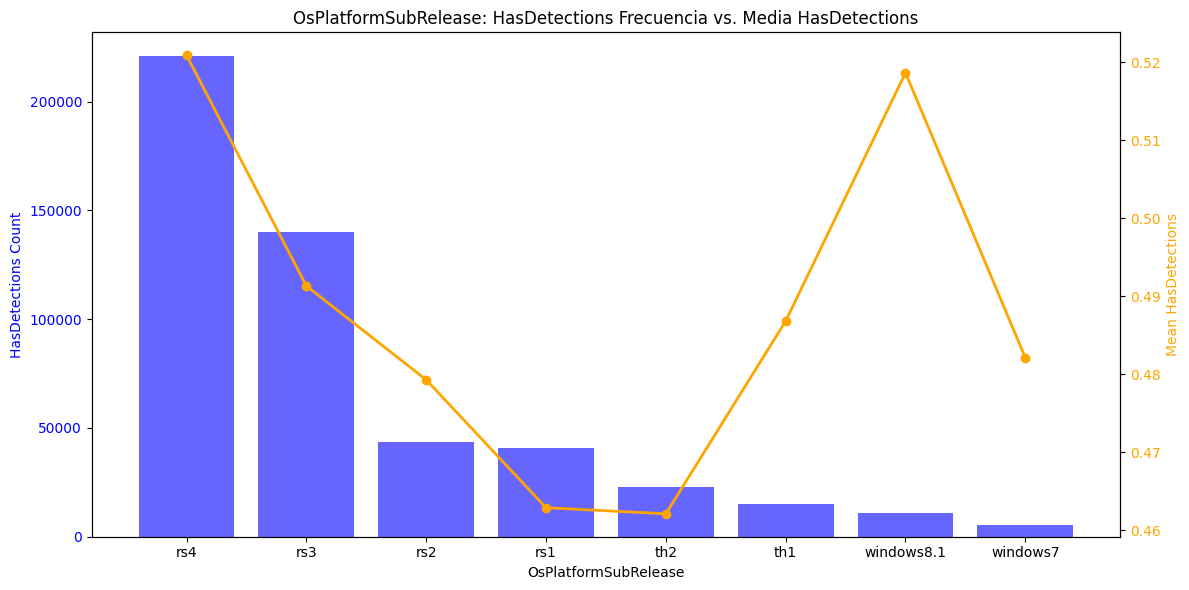

In [26]:
plot_detection_rate_dual_axis(df,'OsPlatformSubRelease', target='HasDetections', top_n=8)


In [27]:
# A pesar de que el grafico parece mostrar lo contrario , el nivel de HasDetections es muy similar y no hay valores predominantes. La media de detection es
# la misma, pese al sistema operativo

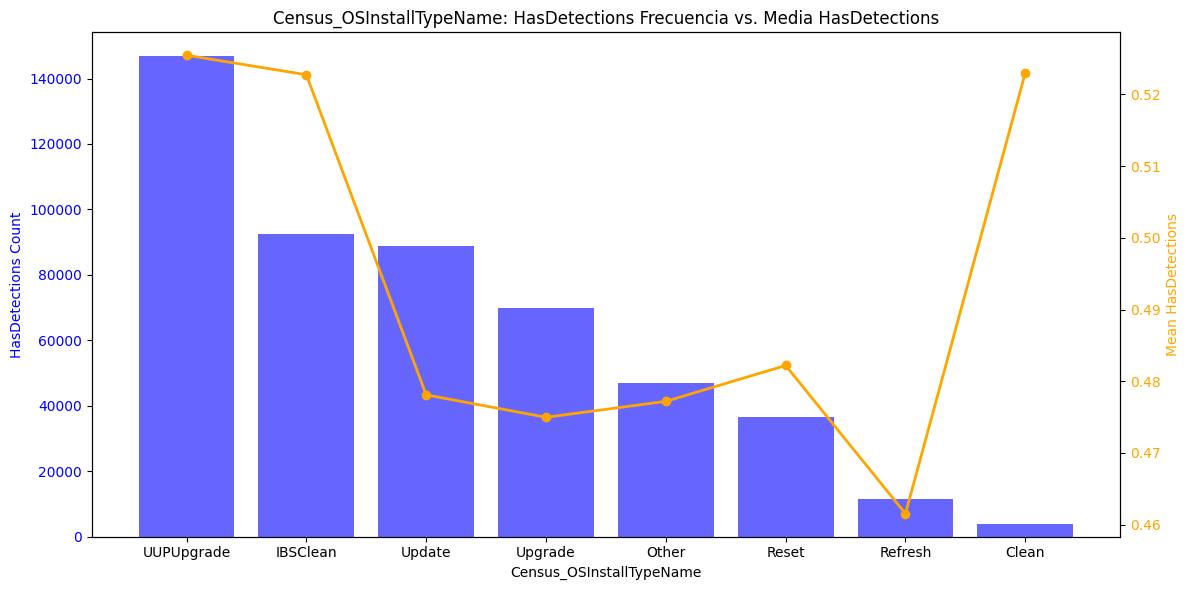

In [28]:
plot_detection_rate_dual_axis(df,'Census_OSInstallTypeName', target='HasDetections', top_n=8)

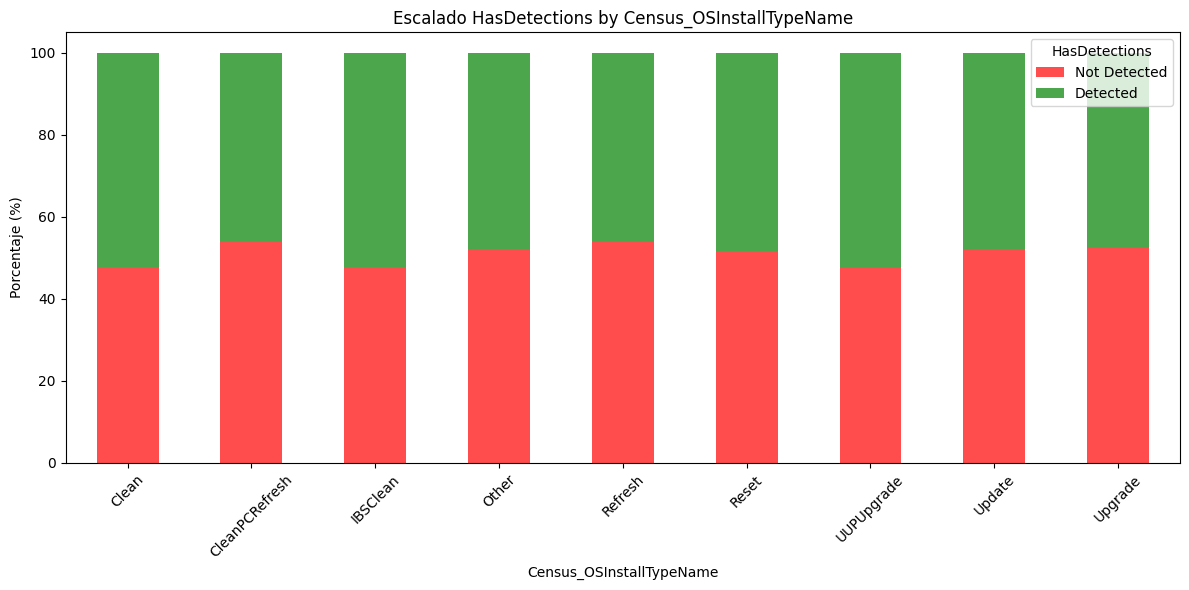

In [29]:
plot_scaled_stacked_bar_chart(df, 'Census_OSInstallTypeName', target='HasDetections')

In [30]:
# Vemos que la mayoria de los pcs han hecho la instalacion de SO mediante el metodo UUUpgrade , pero el nivel de HasDetections es muy similar y no hay valores predominantes. La media de detection es
# la misma respecto al tipo de actualizacion

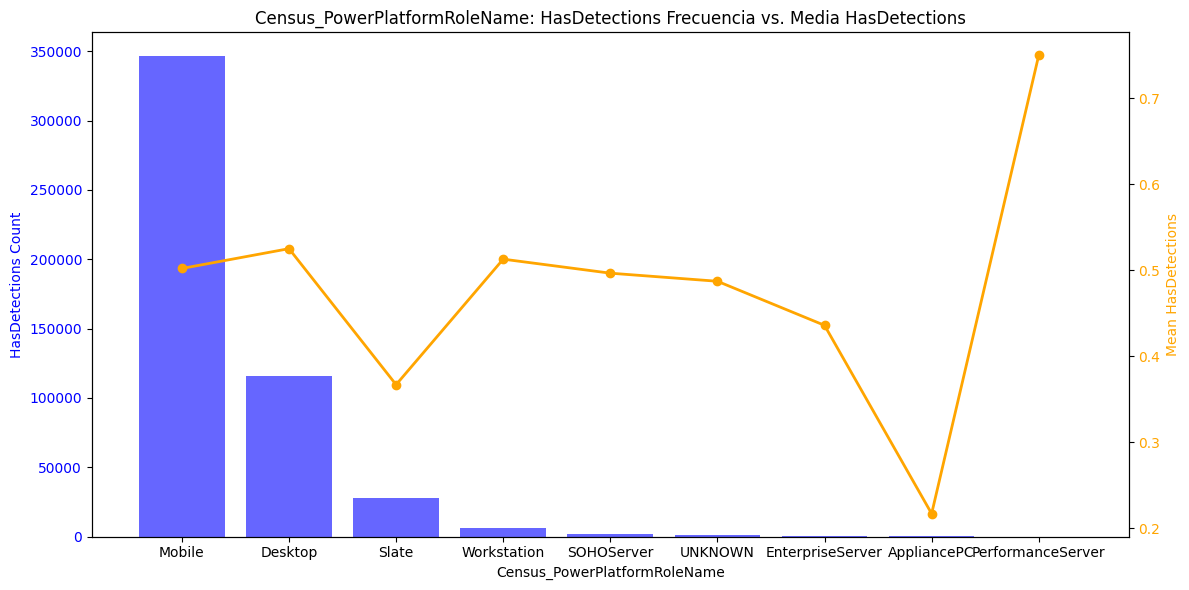

In [31]:
plot_detection_rate_dual_axis(df,'Census_PowerPlatformRoleName', target='HasDetections', top_n=9)

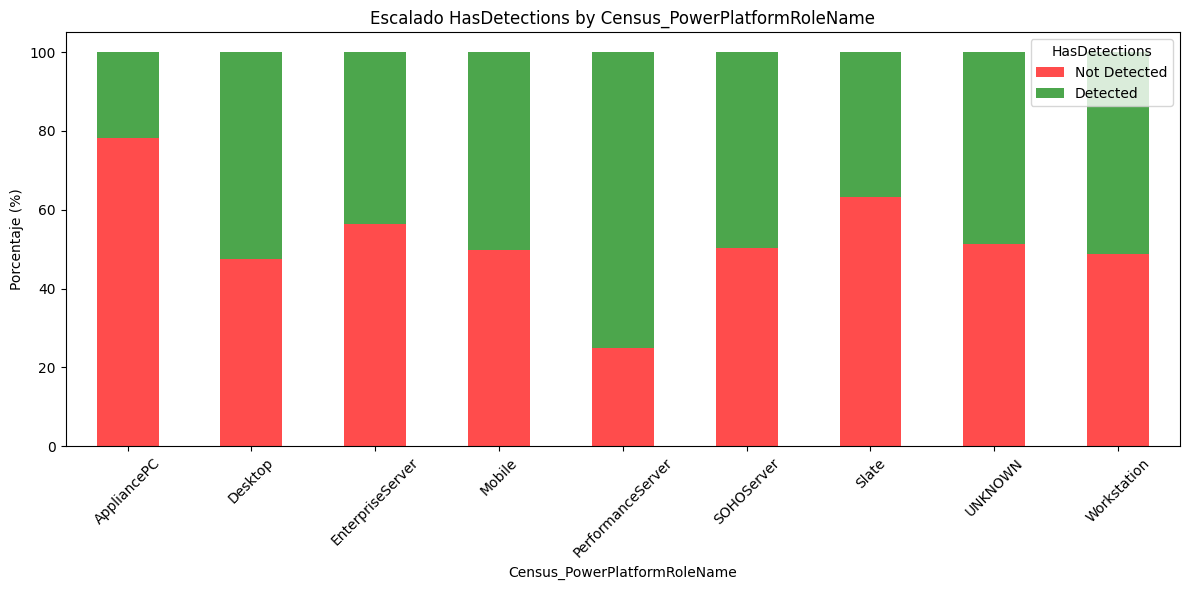

In [32]:
plot_scaled_stacked_bar_chart(df, 'Census_PowerPlatformRoleName', target='HasDetections')

In [33]:
# En este caso podemos observar en el PerformanceServer tenemos mayor tipo de efectividad , en cambio el dispositivo Mobile es el que mas predomina.

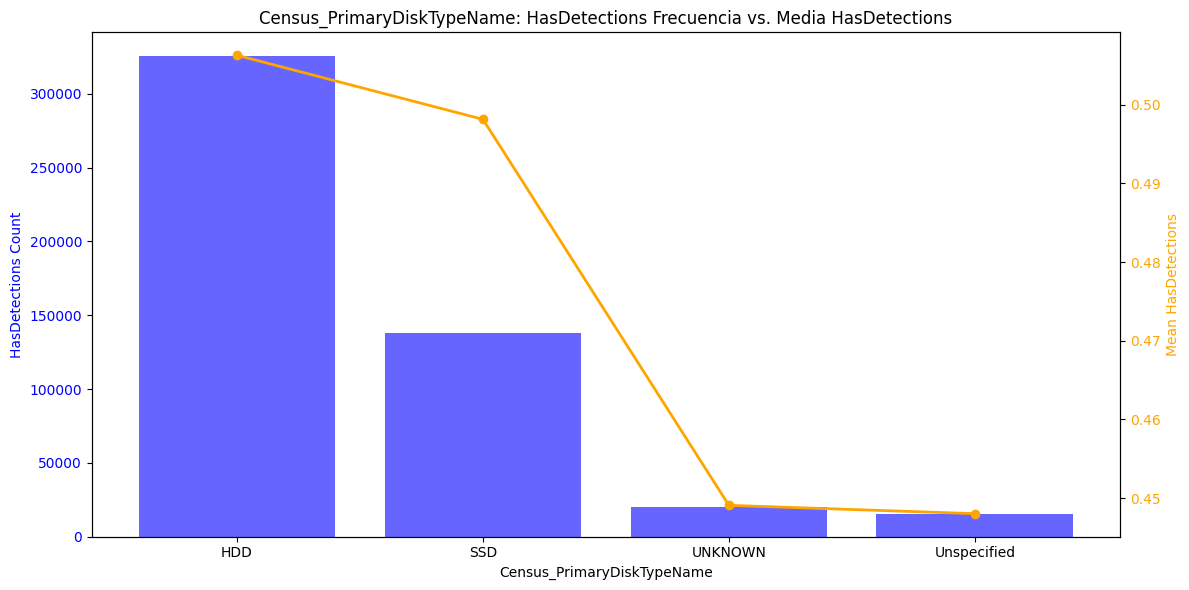

In [34]:
plot_detection_rate_dual_axis(df,'Census_PrimaryDiskTypeName', target='HasDetections', top_n=6)

In [35]:
# Aquellos con registros con HDD tiene mas probabilidad de infectarse ya que seguramente son ordenadores mas antiguos y son  mas vulnerables a los ataques.

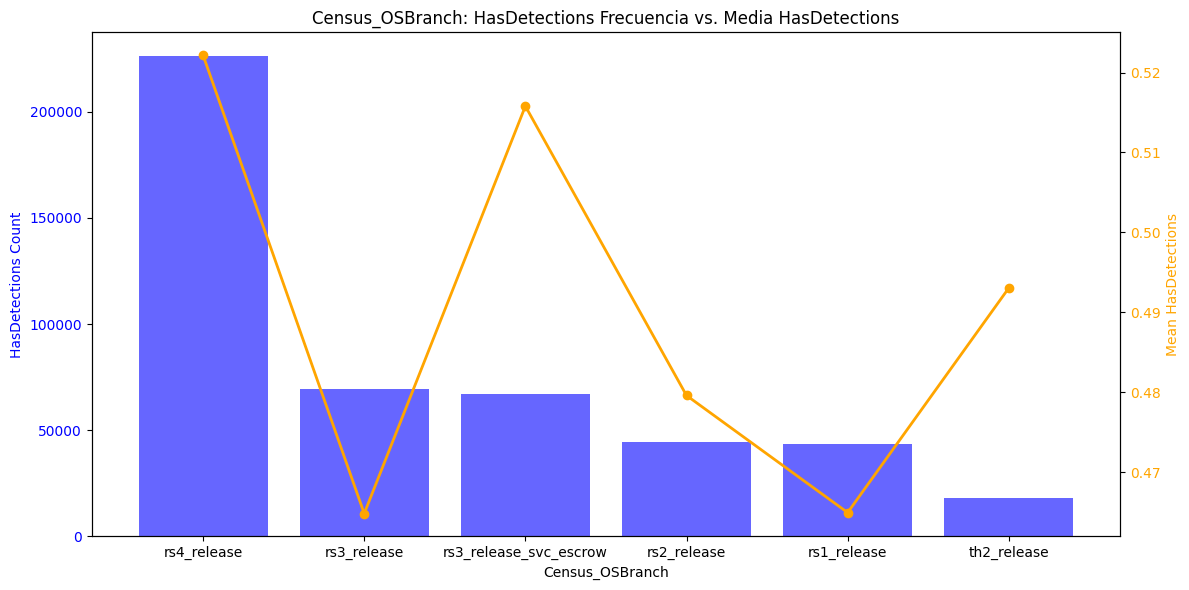

In [36]:
plot_detection_rate_dual_axis(df,'Census_OSBranch', target='HasDetections', top_n=6)

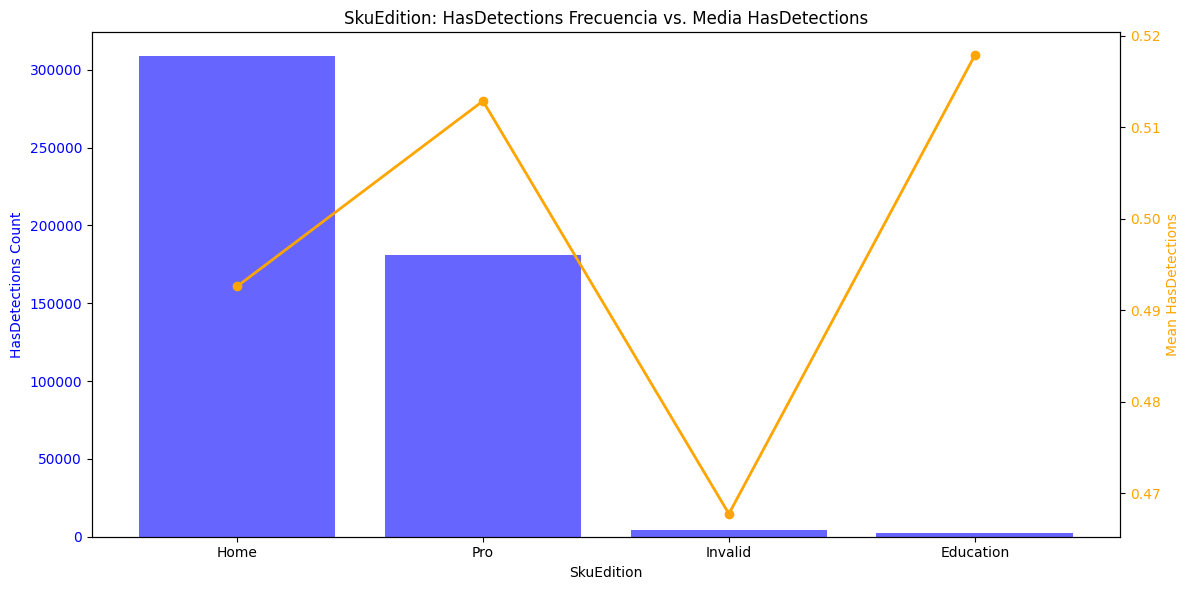

In [37]:
plot_detection_rate_dual_axis(df,'SkuEdition', target='HasDetections', top_n=4)

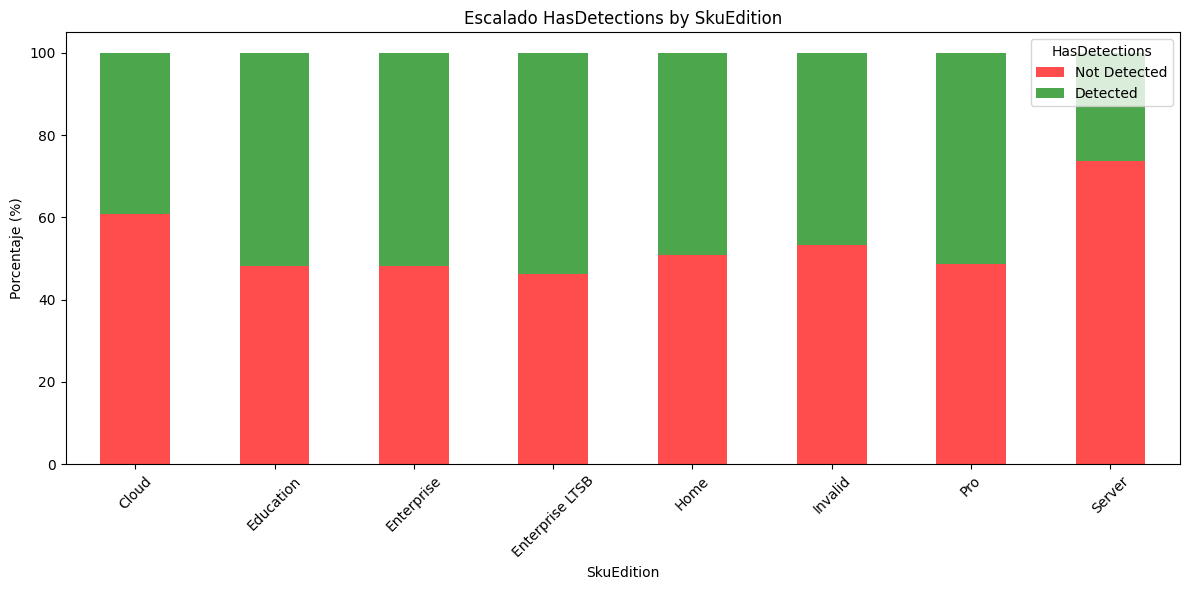

In [38]:
plot_scaled_stacked_bar_chart(df, 'SkuEdition', target='HasDetections')

In [39]:
# Podemos observar que la version Pro no ofrece mayor seguridad respecto a la version Home, los servidores son menos vulnerables a ataques de Malware.

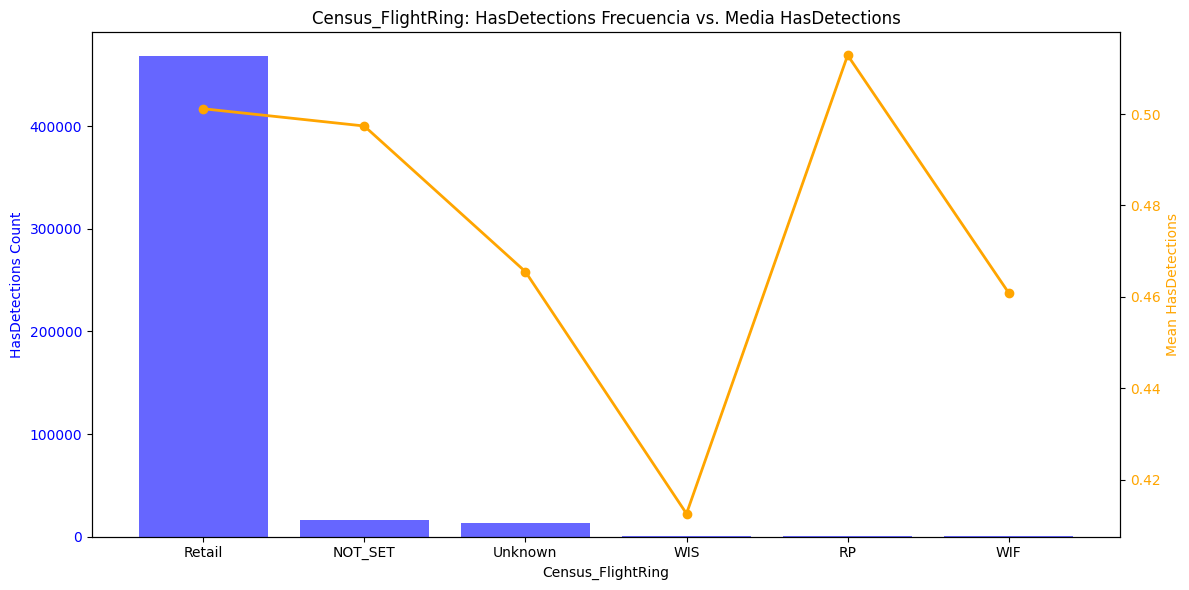

In [40]:
plot_detection_rate_dual_axis(df,'Census_FlightRing', target='HasDetections', top_n=6)

In [41]:
# Las variables categoricas no comentadas no hay informacion relevante que se deba matizar y sin valor a nuestro modelo en este punto del analisis.

###EDA - Variables Numericas

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histograma de Census_OSBuildRevision')

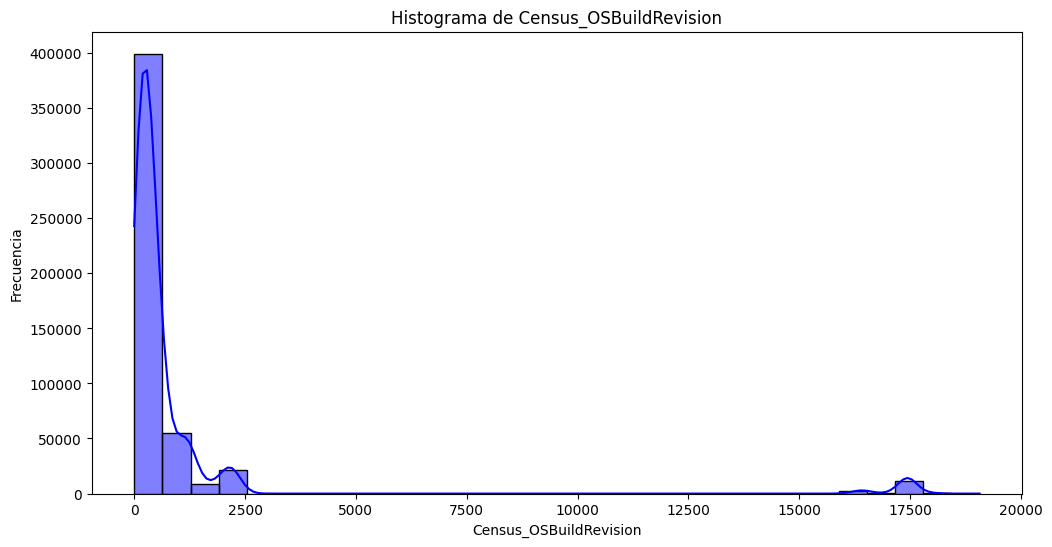

In [42]:
## Graficamente vemos grafica de Census_OSBuildRevision

#Vemos que esta variable no esta normalizada y mas adelante en el analisis Feature Engineering convertimos a logaritmica con el objetivo de poder ayudar a mejorar

data = df['Census_OSBuildRevision']
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))
# Crear un histograma con KDE
sns.histplot(data=data, kde=True, color='blue', bins=30)
plt.xlabel('Census_OSBuildRevision')
plt.ylabel('Frecuencia')
plt.title('Histograma de Census_OSBuildRevision')

In [43]:
def plot_basic_histogram_top_n(df, feature, target='HasDetections', bins=50, top_n=8):
    plt.figure(figsize=(14, 6))
    # Los top N valores mas frecuentes
    top_values = df[feature].value_counts().nlargest(top_n).index
    # Filtra el dato, si la variable esta entre los Top N variables
    df_filtered = df[df[feature].isin(top_values)]
    # Informacion del target
    data_0 = df_filtered[df_filtered[target] == 0][feature]
    data_1 = df_filtered[df_filtered[target] == 1][feature]
    # Histograma de la variable con respecto al target
    plt.hist([data_0, data_1], bins=bins, color=['blue', 'orange'], alpha=0.7, label=['Not Detected', 'Detected'])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{target} by {feature} (Top {top_n} Most Common)')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [44]:
# Funcion para hacer graficos de variables numericas con respecto a una variable target
def plot_kde(df, feature, target='HasDetections'):

    plt.figure(figsize=(14, 6))

    sns.kdeplot(data=df[df[target] == 0], x=feature, label='Not Detected', shade=True, color='blue')
    sns.kdeplot(data=df[df[target] == 1], x=feature, label='Detected', shade=True, color='orange')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'{target} by {feature}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [45]:
# Funcion para mostrar un histograma para variables numericas con respecto al target
def plot_basic_histogram(df, feature, target='HasDetections', bins=50):

    plt.figure(figsize=(14, 6))

    data_0 = df[df[target] == 0][feature]
    data_1 = df[df[target] == 1][feature]

    plt.hist([data_0, data_1], bins=bins, color=['blue', 'orange'], alpha=0.7, label=['Not Detected', 'Detected'])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{target} by {feature}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [46]:
def calculate_sums(df, column, target_column):
    # Inicializar variables para contar la suma de detecciones y no detecciones
    sum_detected = 0
    sum_not_detected = 0
    # Obtener las categorías únicas de la variable objetivo
    unique_targets = df[target_column].unique()
    # Calcular target_subset y subset_no_nan una vez fuera del bucle
    target_subset = df[df[target_column].isin(unique_targets)]
    subset_no_nan = target_subset.dropna(subset=[column])
    # Iterar a través de los valores únicos del target
    for target_value in unique_targets:
        # Sumar las veces que ha sido detectado o no el virus
        if target_value == 1:
            sum_detected = subset_no_nan[subset_no_nan[target_column] == target_value][column].sum()
        else:
            sum_not_detected = subset_no_nan[subset_no_nan[target_column] == target_value][column].sum()
    return sum_detected, sum_not_detected,subset_no_nan



In [47]:
def perform_eda(df, target_column, numeric_columns):
    # Filtrar el DataFrame para incluir solo las columnas numéricas
    df_numeric = df[numeric_columns].dropna()
    # Obtener las categorías únicas de la variable objetivo
    unique_targets = df[target_column].unique()
    # Iterar a través de las columnas numéricas para crear histogramas
    for column in df_numeric.columns:
        # Crear una figura para el histograma
        plt.figure(figsize=(12, 8))
        # Calcular las sumas de detecciones y no detecciones
        sum_detected, sum_not_detected, subset_no_nan = calculate_sums(df, column, target_column)
        # Iterar a través de los valores únicos del target
        for target_value in unique_targets:
            # Histograma para el valor actual del target
            sns.histplot(data=subset_no_nan[subset_no_nan[target_column] == target_value], x=column, bins=20, kde=True,
                         label=f'{target_column}={target_value}')
        plt.title(f'Sum of {column} by {target_column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

In [48]:
def eda_by_target(data_path, target_column, numeric_columns):
    # Cargar los datos
    #df = load_data(data_path)
    df = data_path
    # Realizar el EDA
    perform_eda(df, target_column, numeric_columns)

In [49]:
# Funcion que hemos utilizado para realizar el analisis exahustivo de TODAS las variables numericas y extraer las variables que aportan mas valor, las cuales mostramos por separado.
# En principio esta sententica esta comentado para agilizar la ejecucion del dataframe

#eda_by_target(df, TARGET, lnum)

In [50]:
# EDA detallado en las siguiente variables numericas
funciones_numericas_analizables = [
    "AVProductStatesIdentifier",
    "AVProductsInstalled",
    "CountryIdentifier",
    "CityIdentifier",
    "OrganizationIdentifier",
    "GeoNameIdentifier",
    "LocaleEnglishNameIdentifier",
    "OsBuild",
    "OsSuite",
    "IsProtected",
    "Census_OEMNameIdentifier",
    "Census_OEMModelIdentifier",
    "Census_ProcessorManufacturerIdentifier",
    "Census_ProcessorModelIdentifier",
    "Census_InternalPrimaryDisplayResolutionVertical",
    "Census_InternalBatteryNumberOfCharges",
    "Census_OSBuildRevision",
    "Census_OSInstallLanguageIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_IsSecureBootEnabled",
    "Census_IsTouchEnabled",
    "Wdft_IsGamer",
    "Wdft_RegionIdentifier"
]

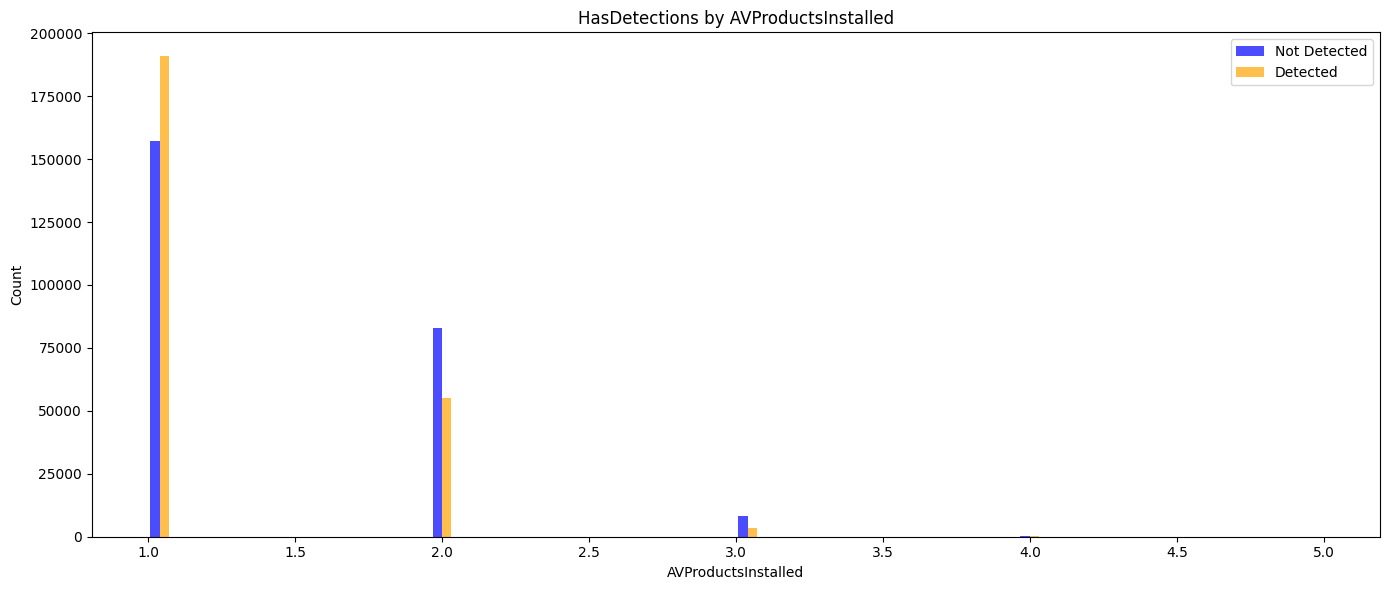

In [51]:
# Mostramos grafico de barras para las siguientes variables 'AVProductsInstalled'
plot_basic_histogram(df, 'AVProductsInstalled', target='HasDetections')

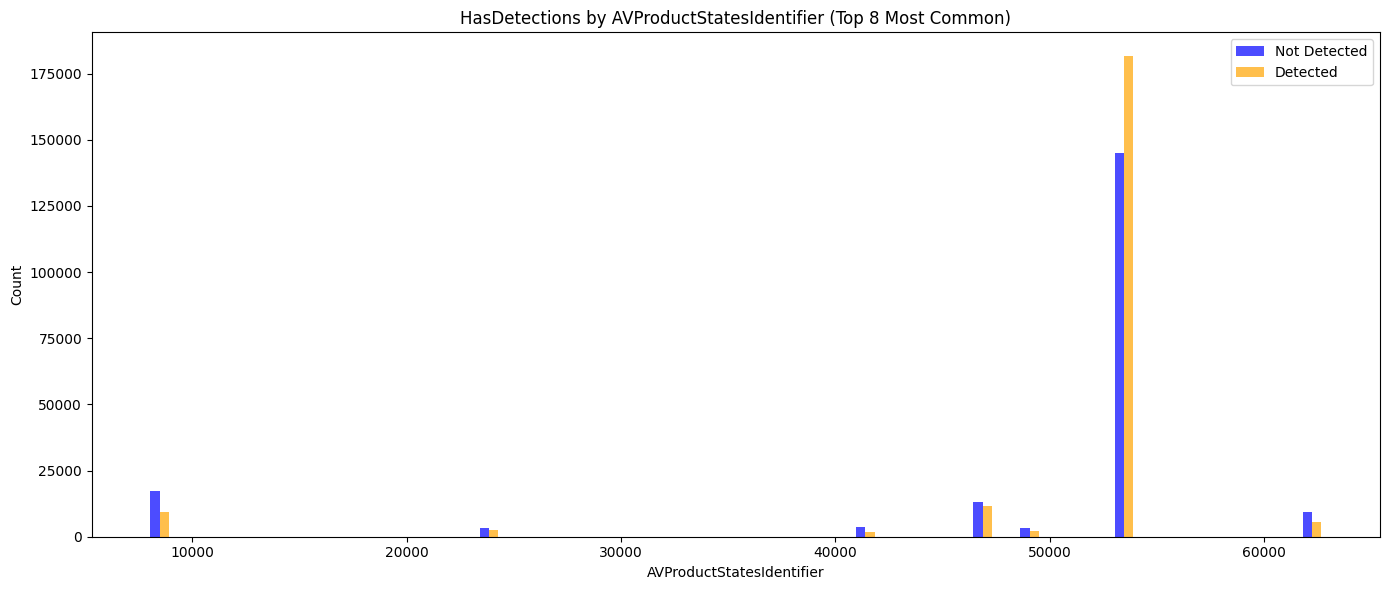

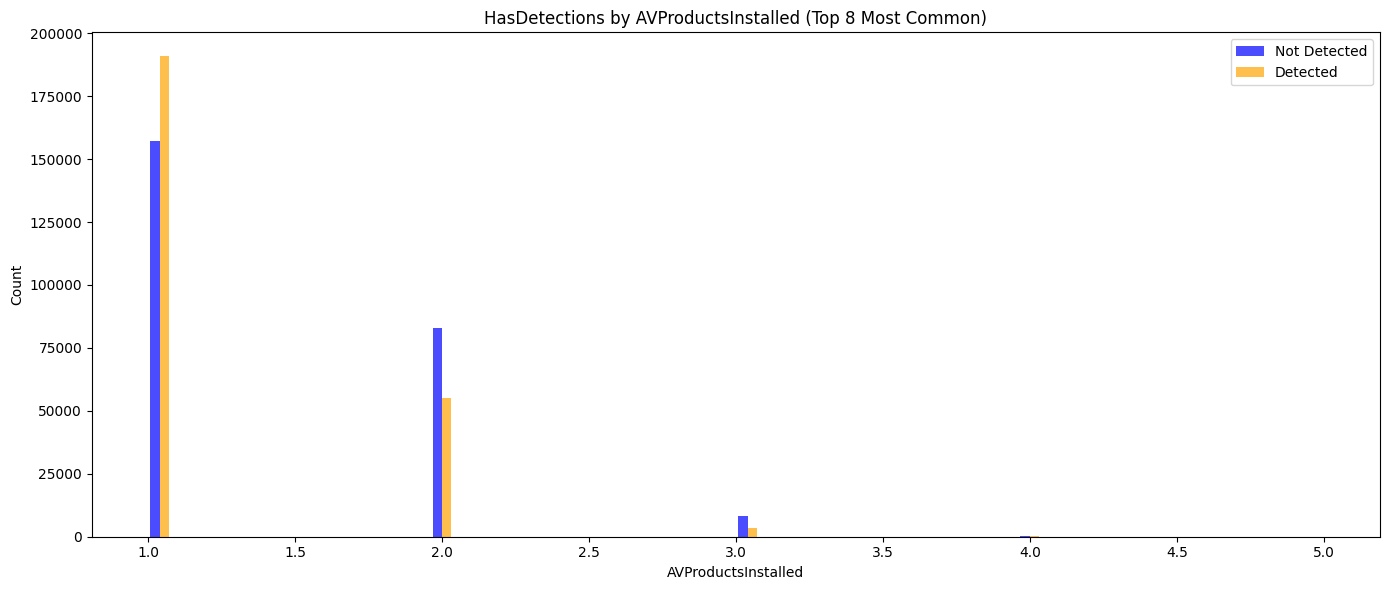

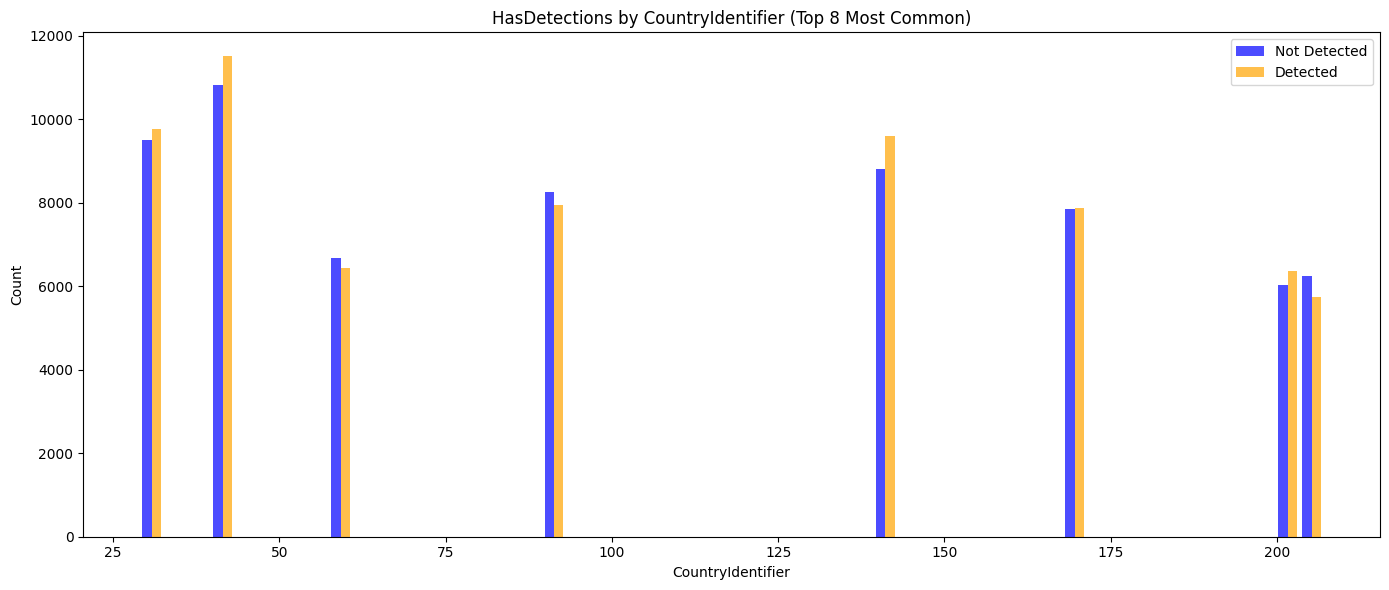

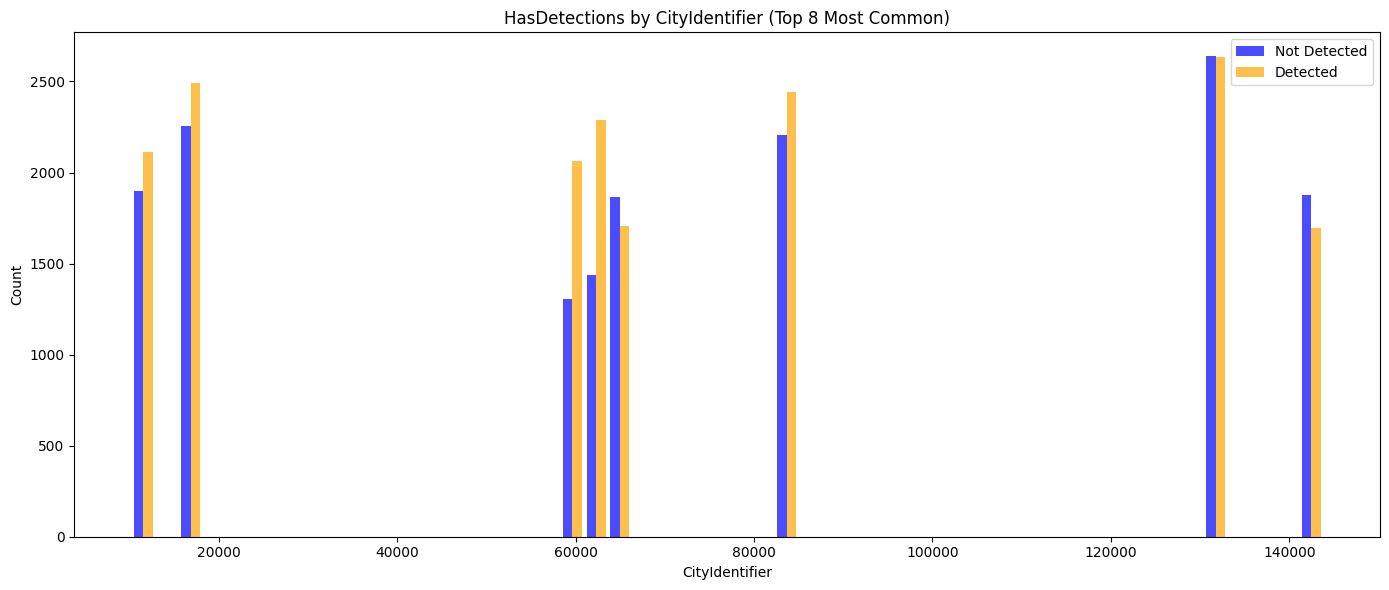

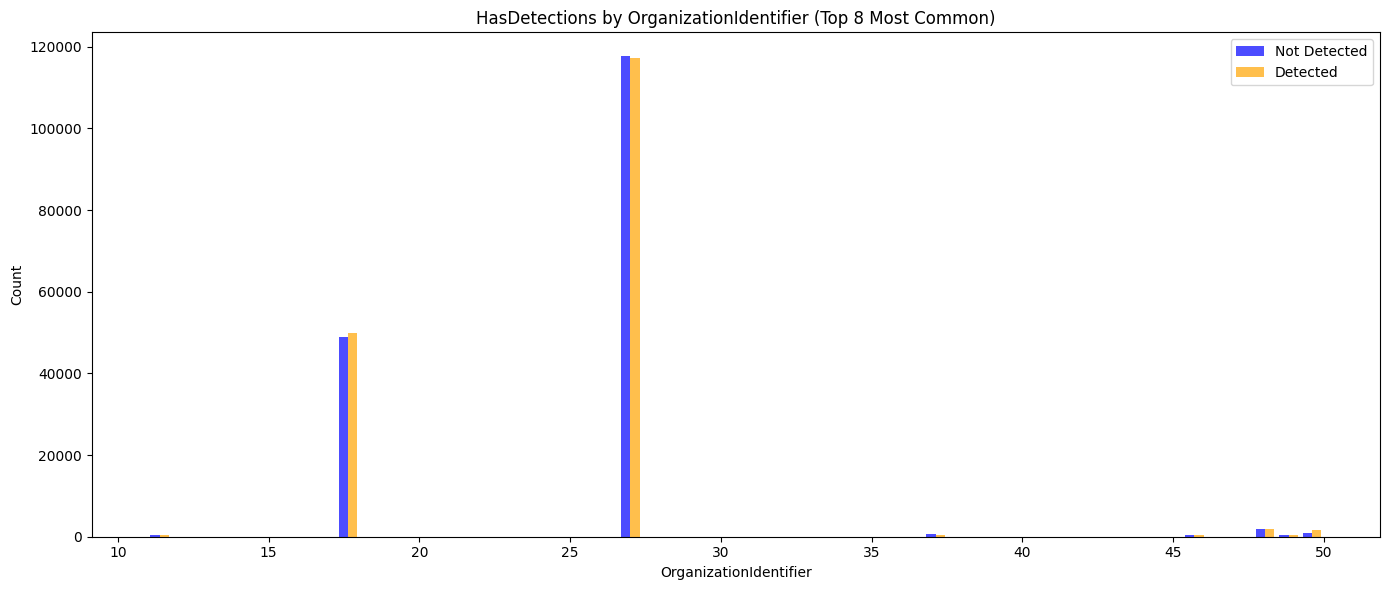

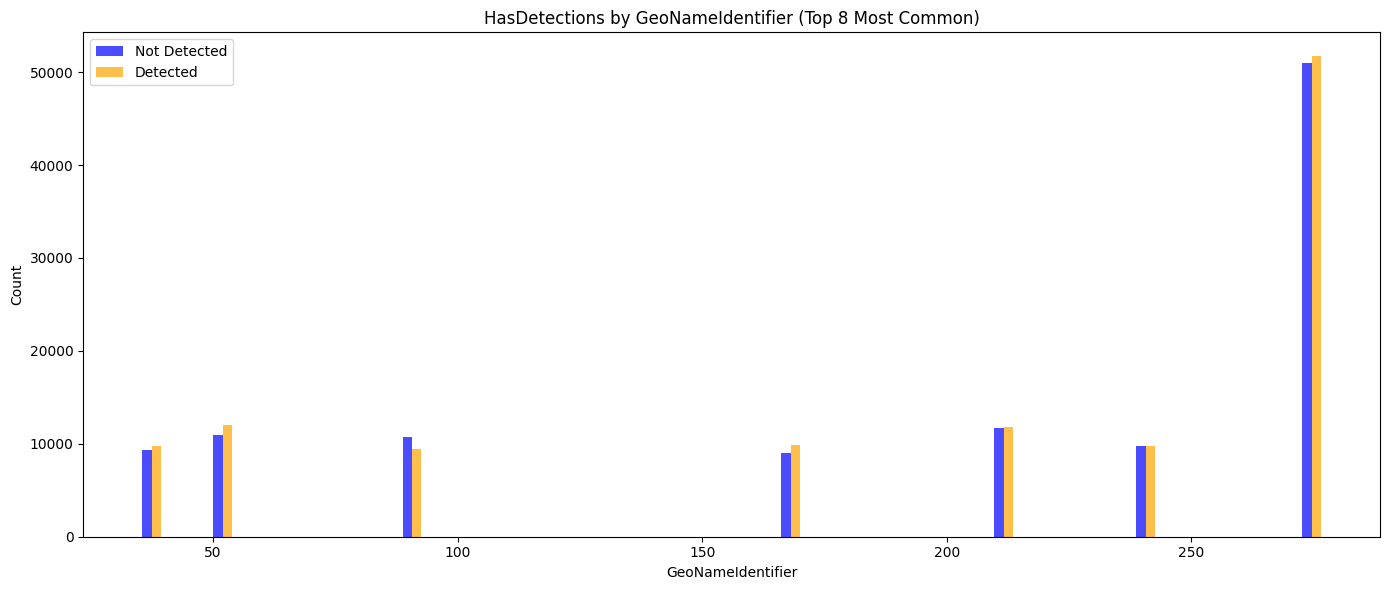

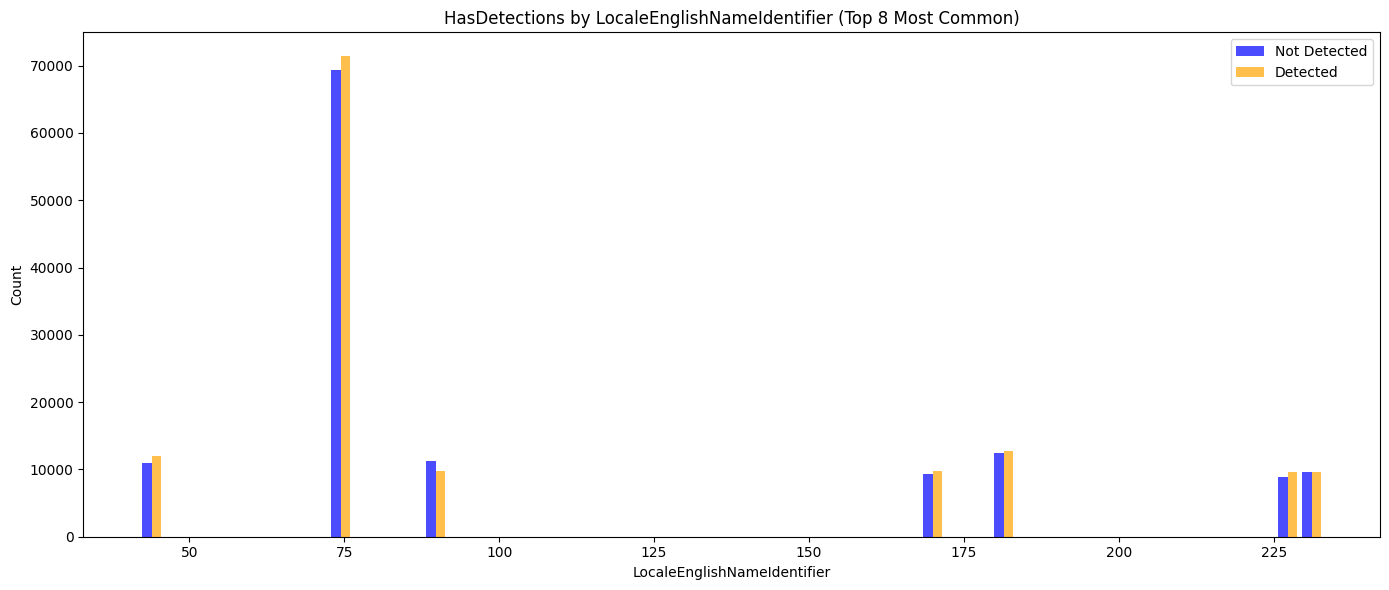

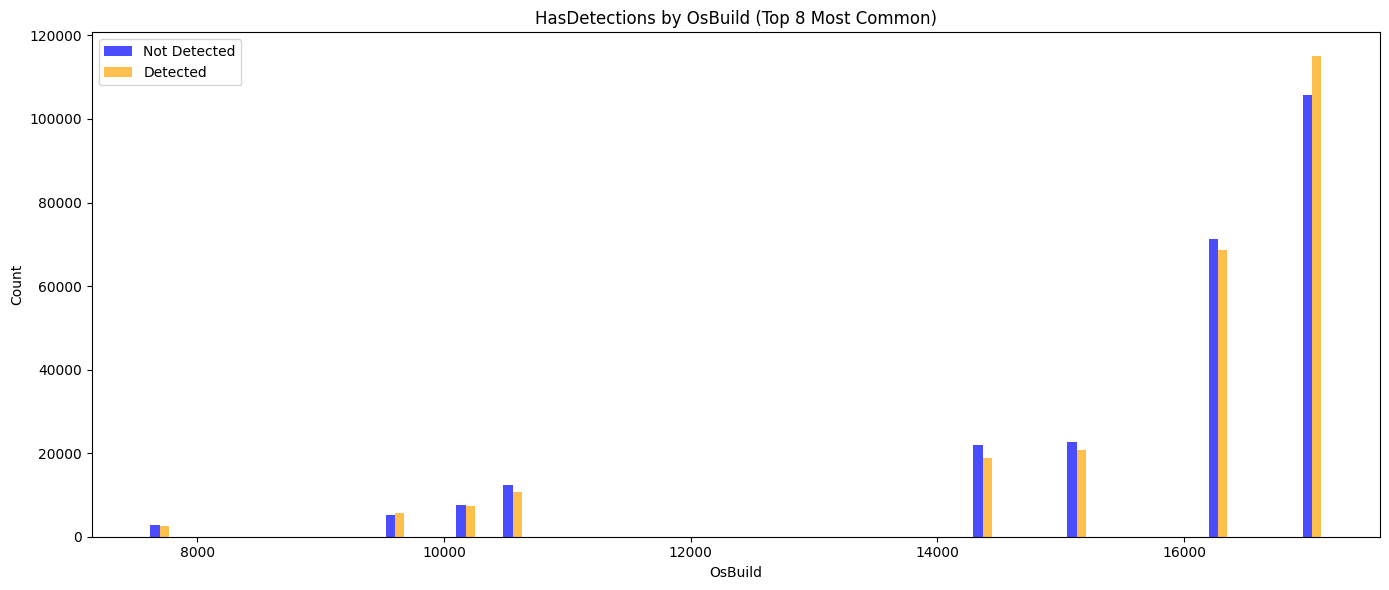

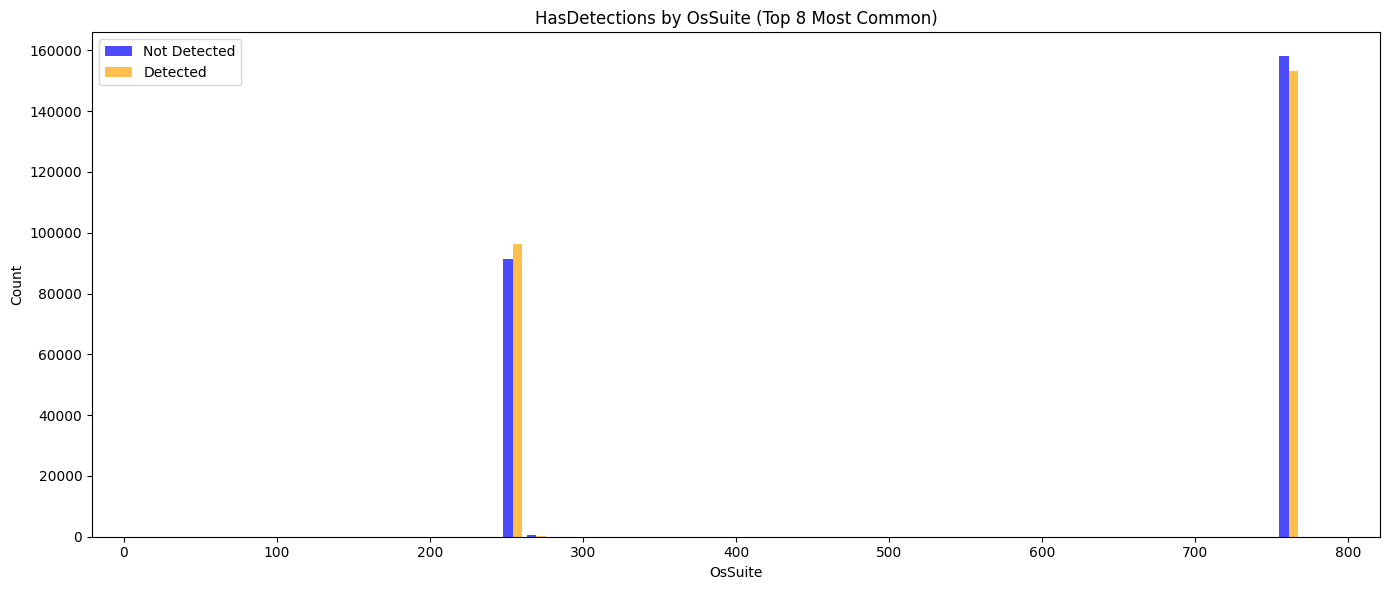

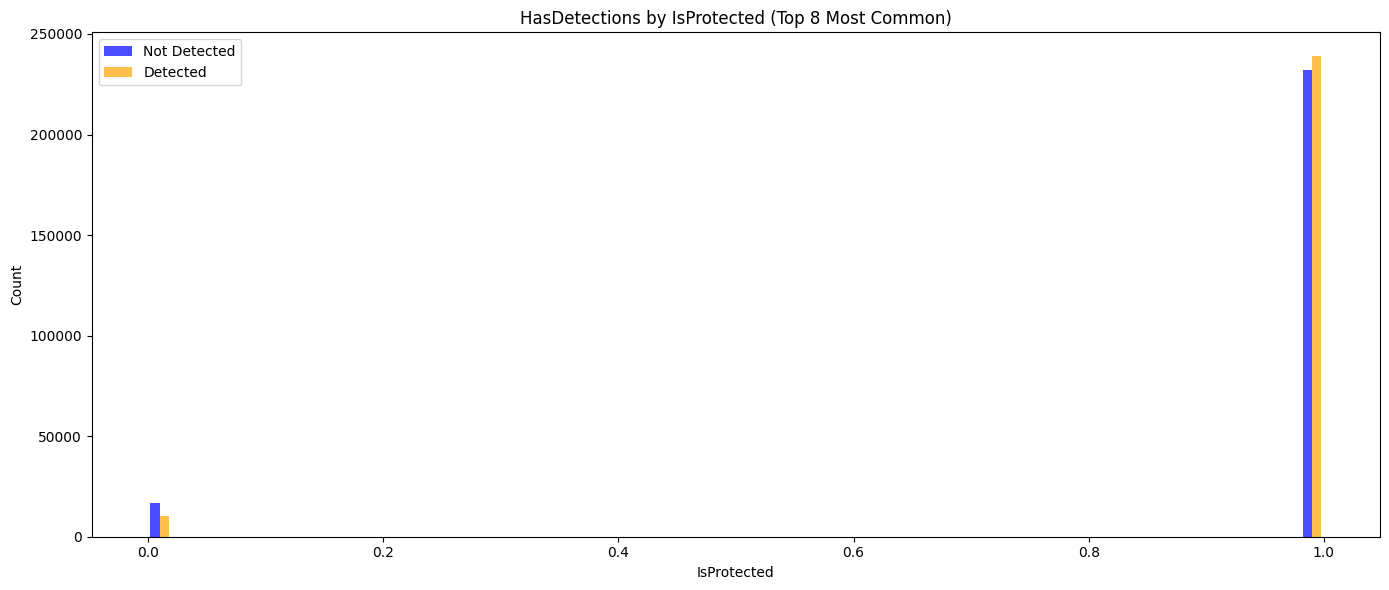

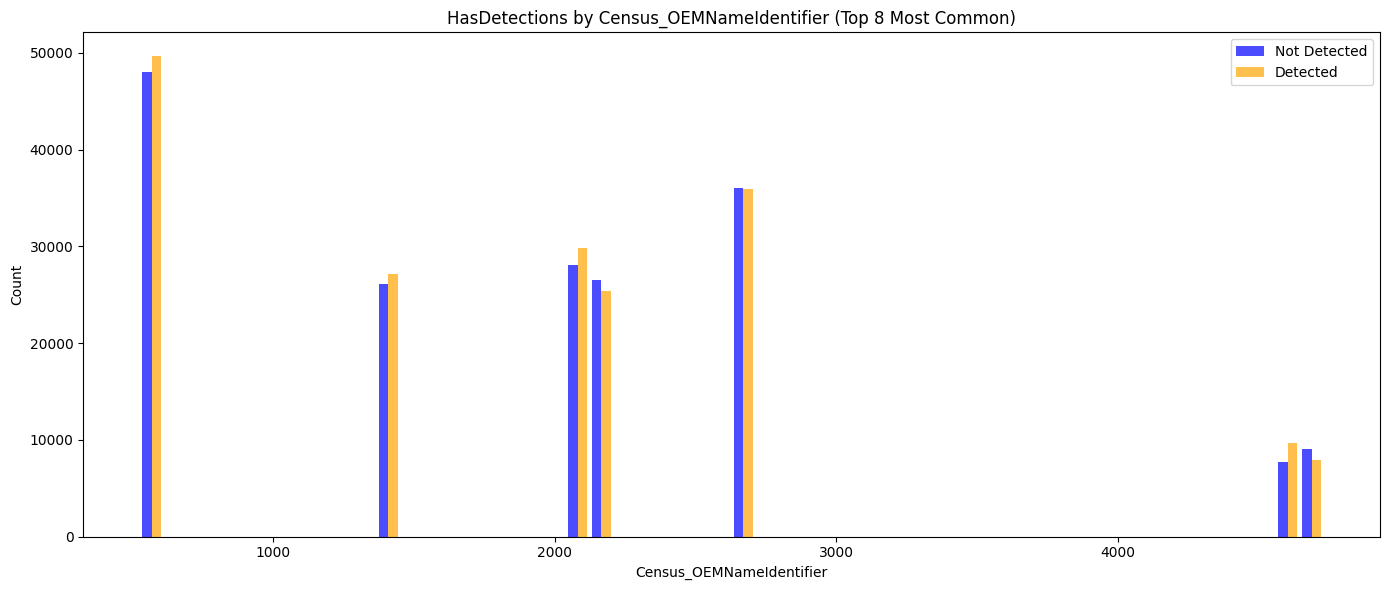

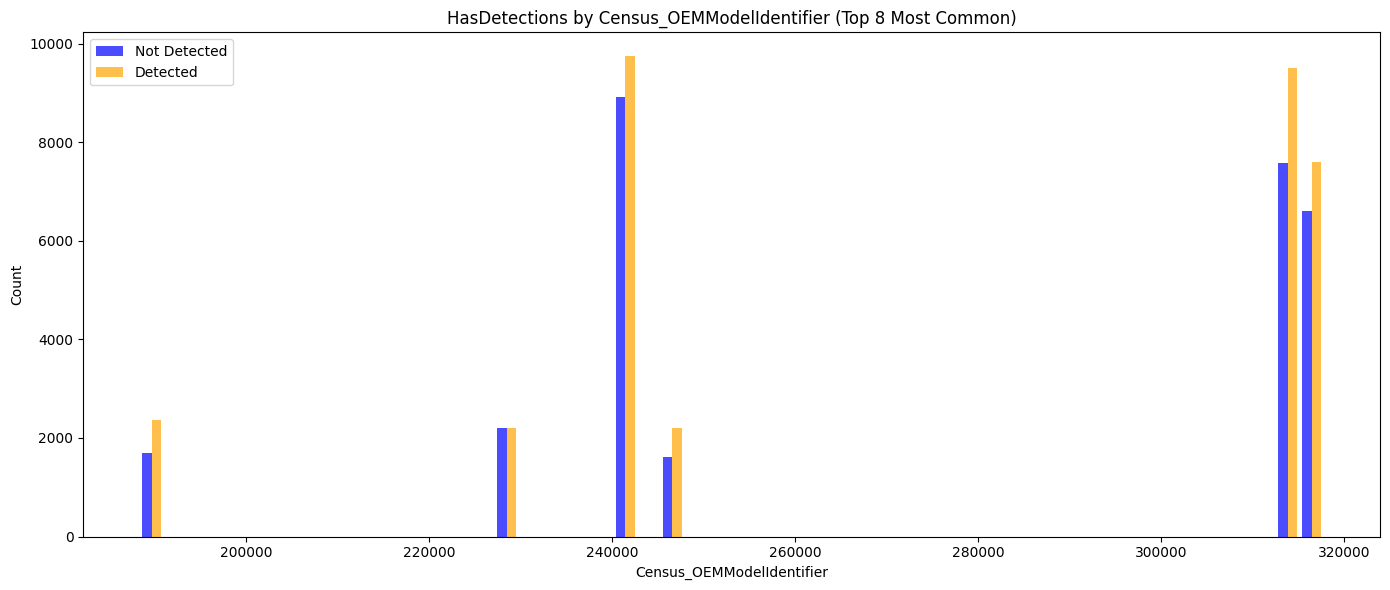

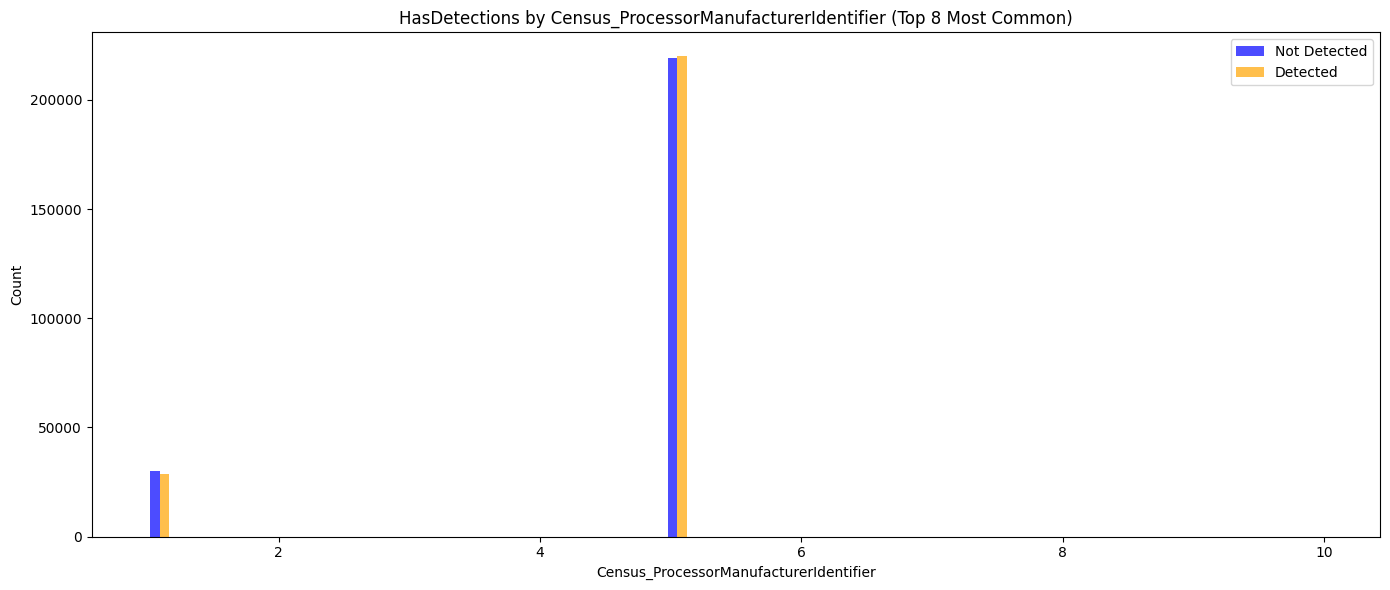

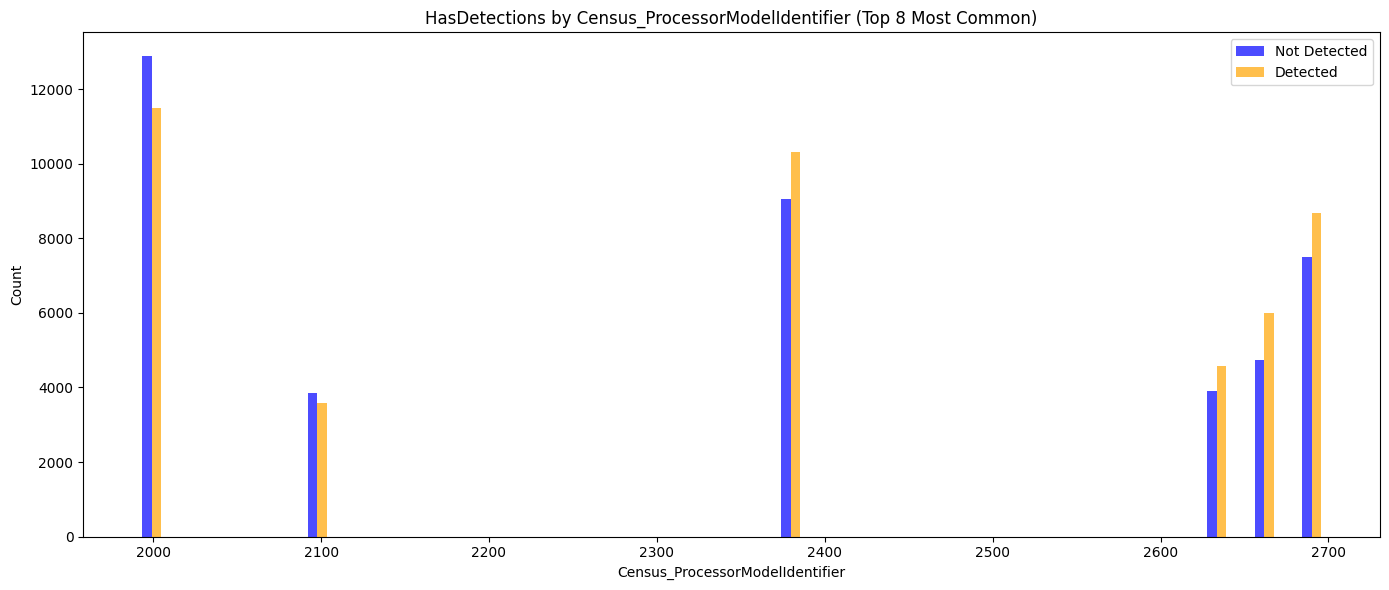

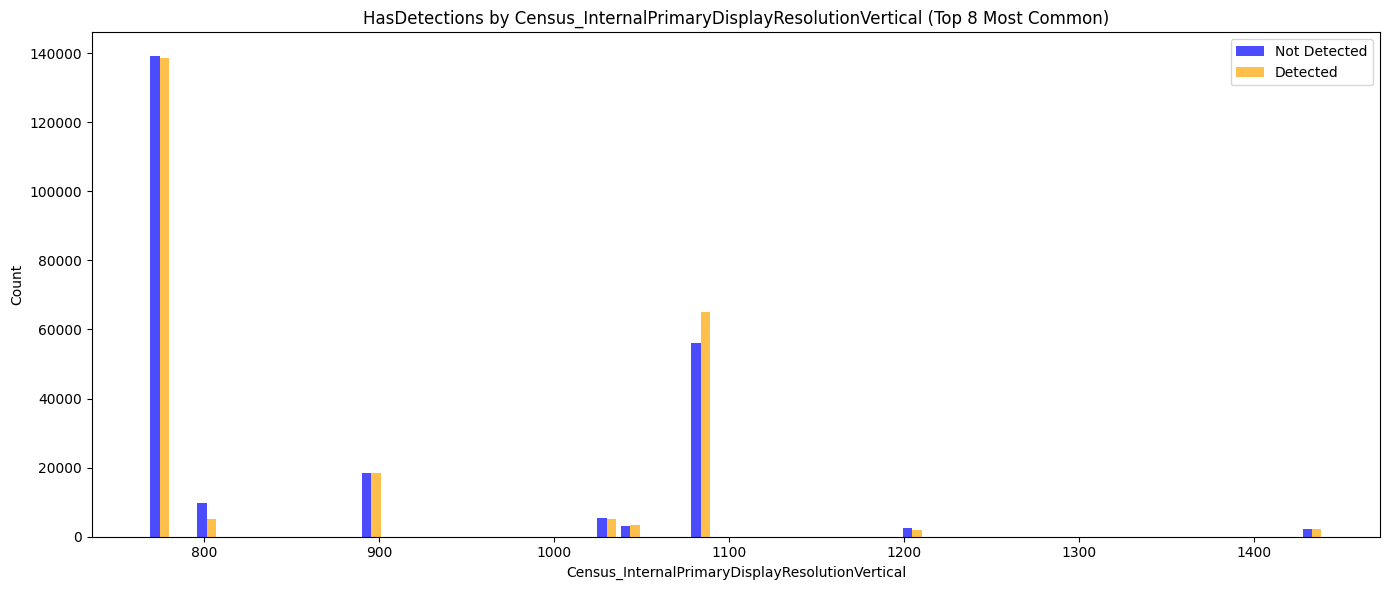

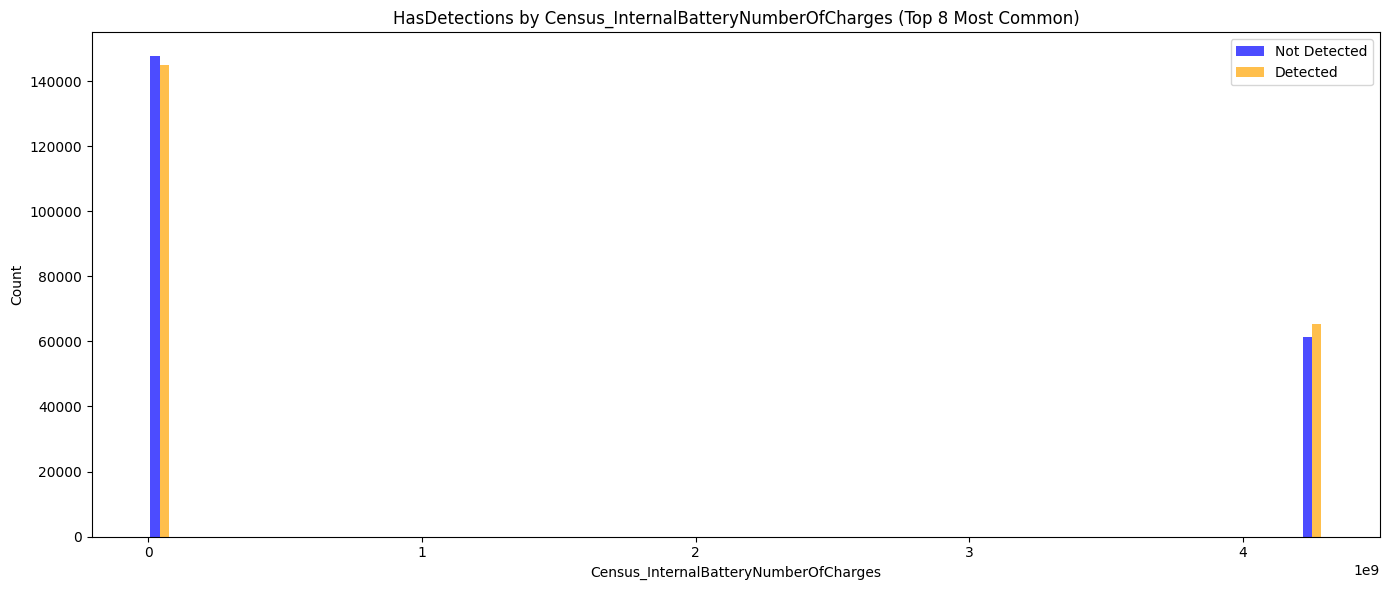

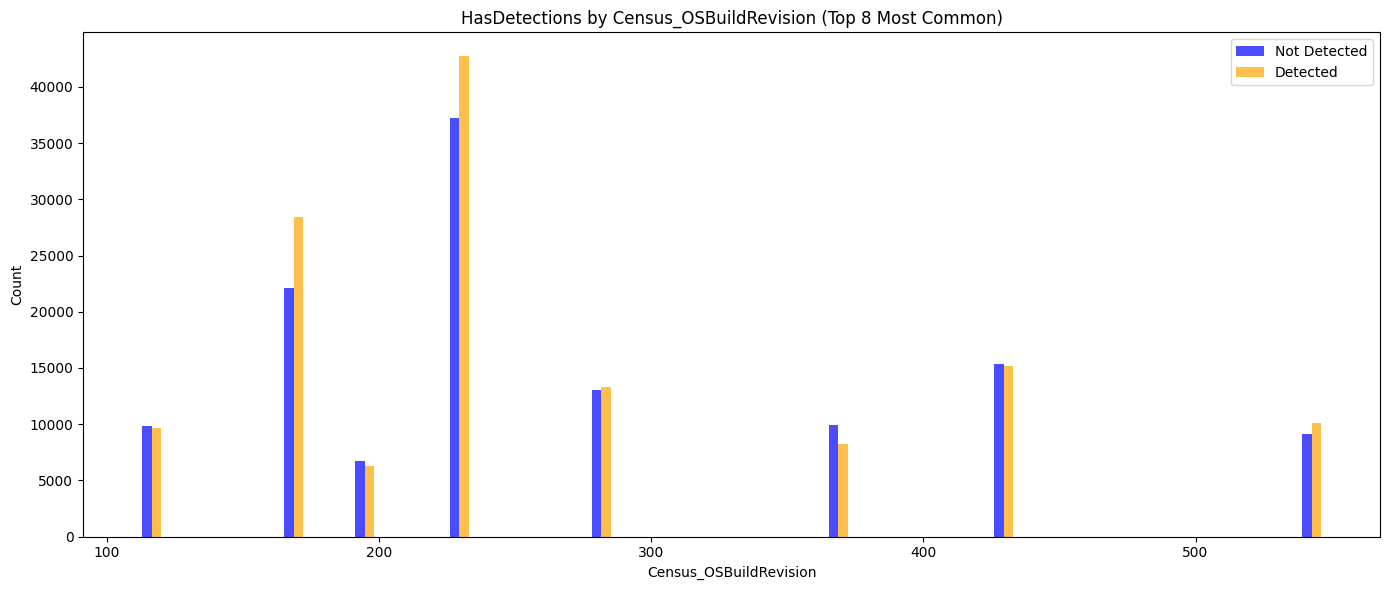

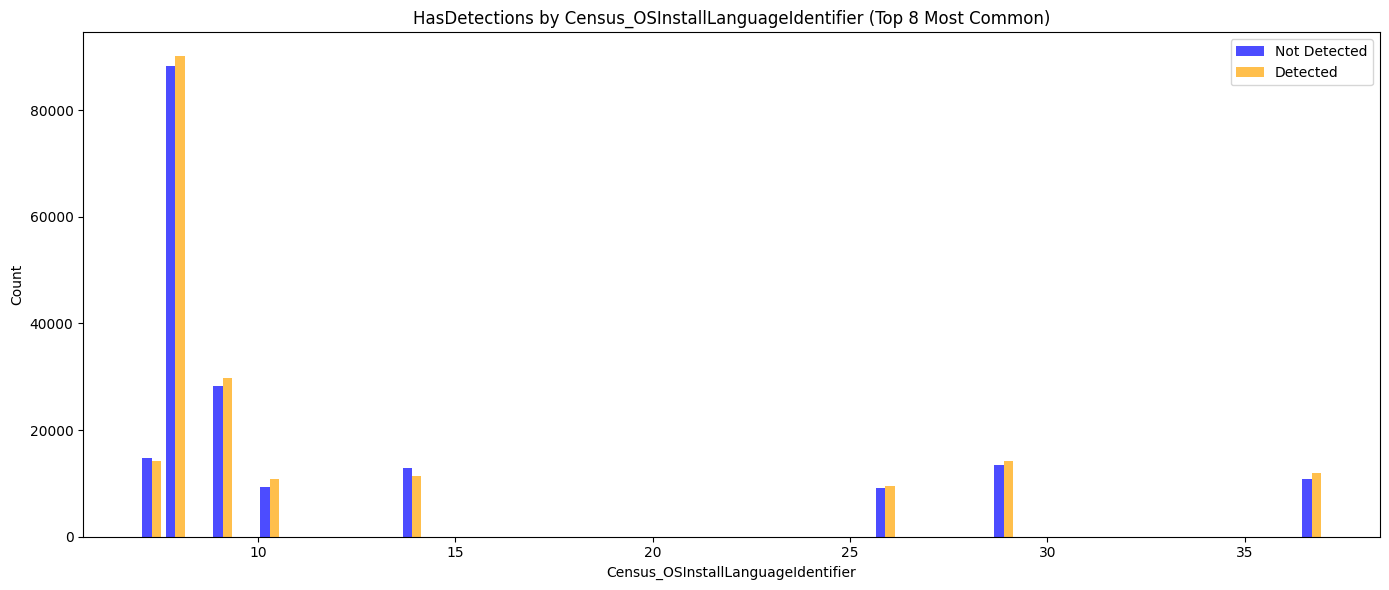

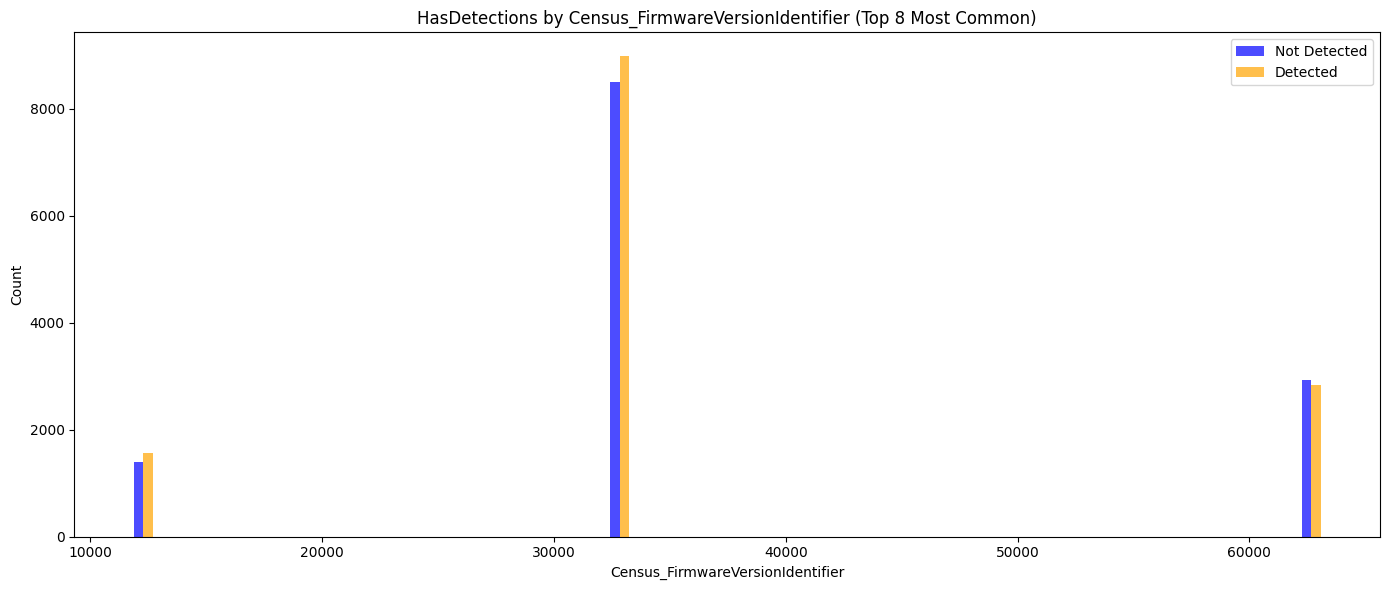

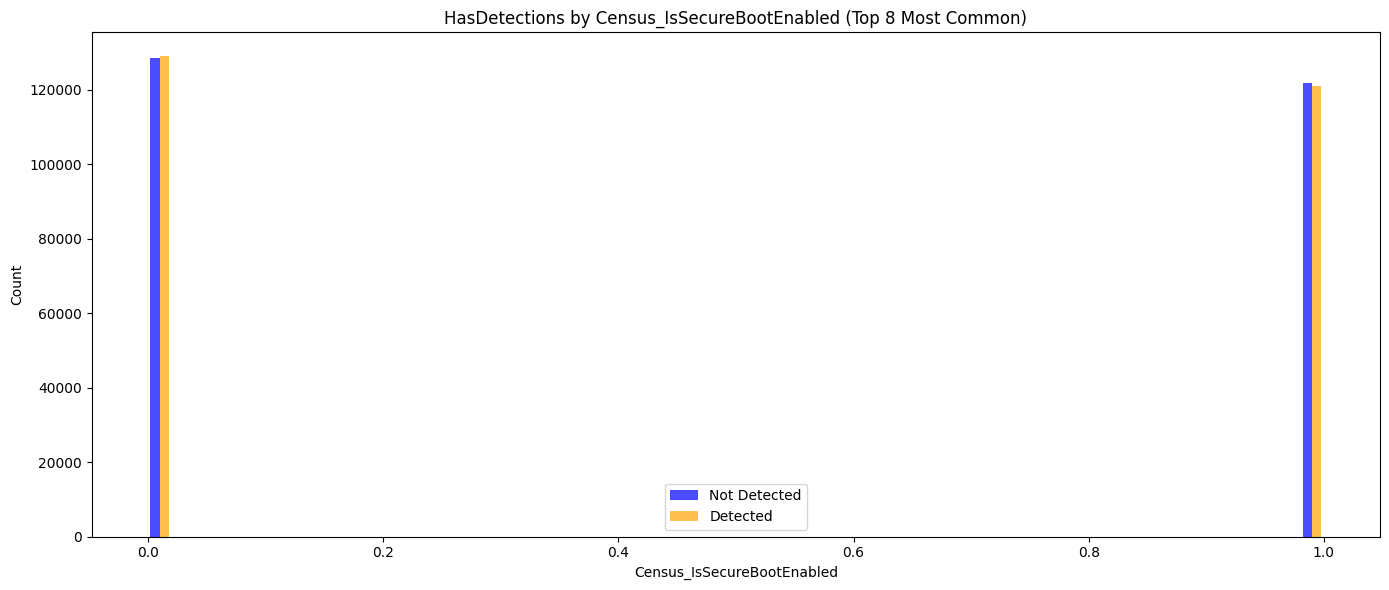

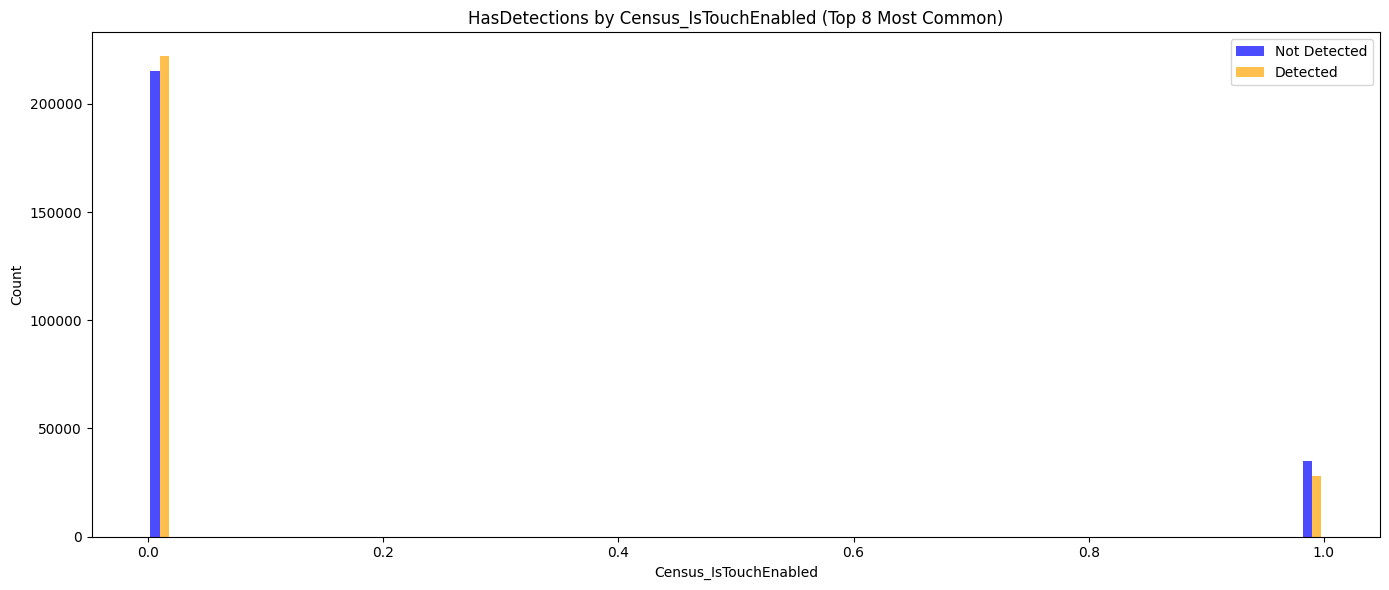

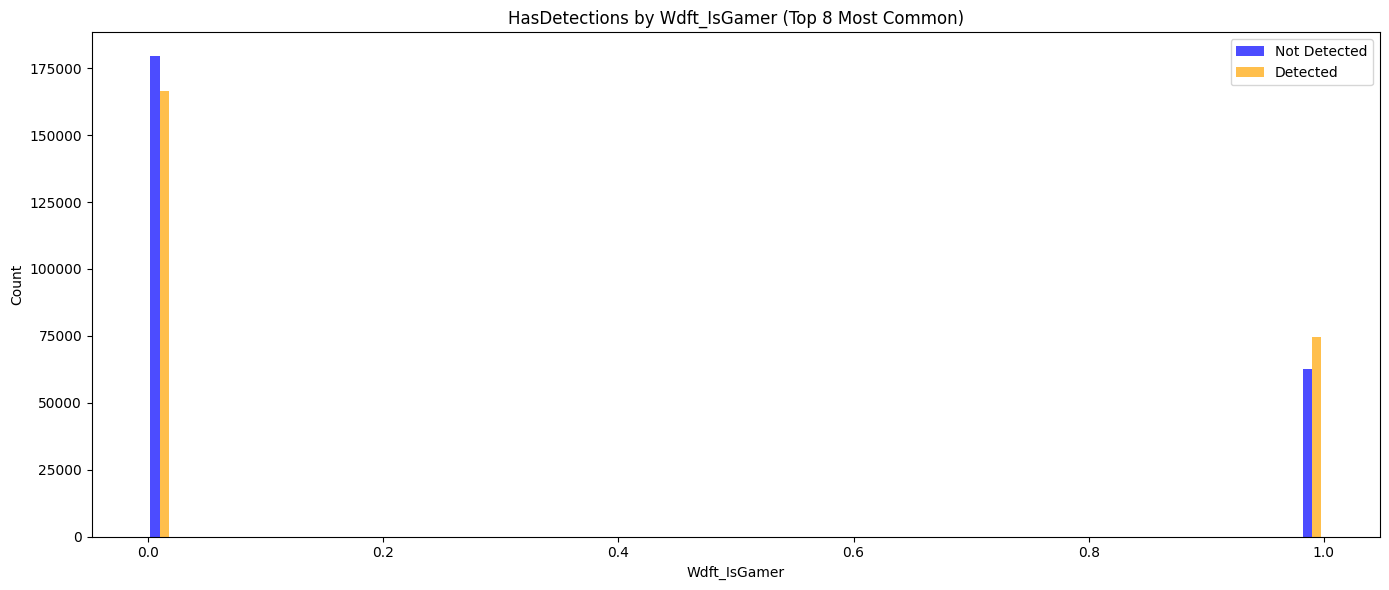

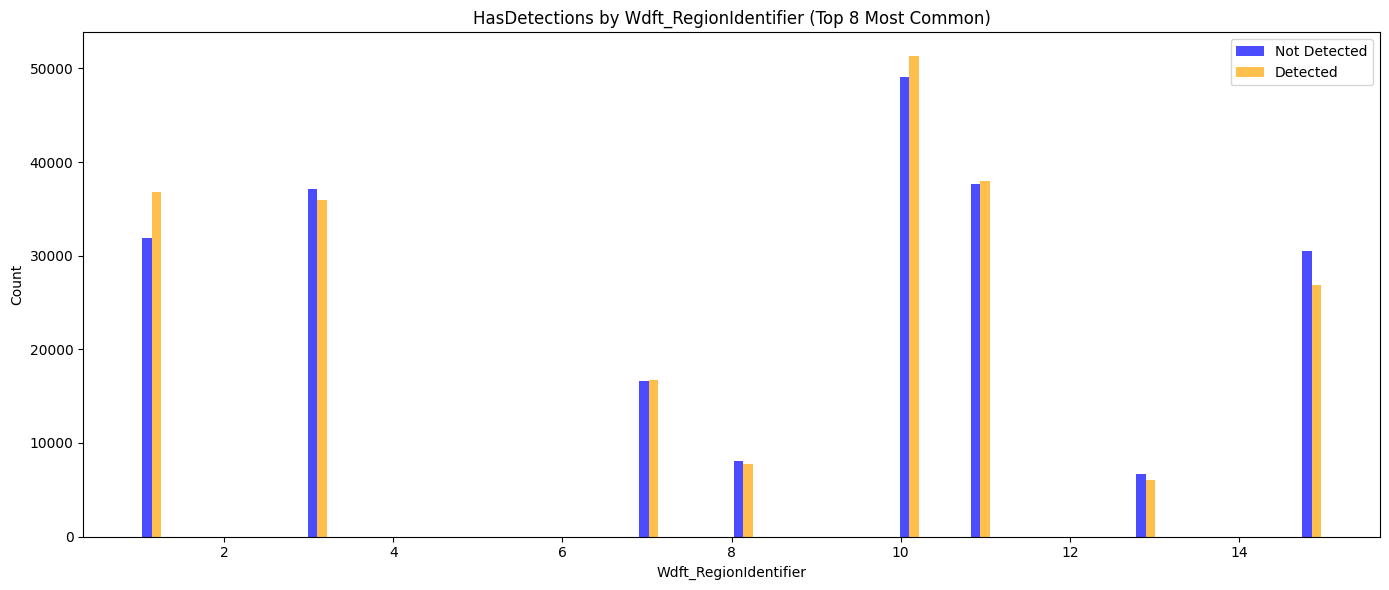

In [52]:
# Bucle para aplicar la función plot_kde a cada característica en funciones_numericas_analizables
for feature in funciones_numericas_analizables:
    # Comprueba si la característica existe en el DataFrame
    if feature in df.columns:
        #mostraremos grafico dentro de cada variable de las top=8 (parametro funcion) mas frecuentes
        plot_basic_histogram_top_n(df, feature, target='HasDetections')
    else:
        print(f"La característica {feature} no se encuentra en el DataFrame.")

In [53]:
# Resumen EDA
# CountryIdentifier --> el rate es aproximadamente el mismo en global en los graficos, y si hay paises que tienen muchos dispositivos.
# CityIdentifier--> misma explicacion que para CountryIdentifier
# AVProductsInstalled --> Los pcs con un un producto(antivirus) instalado tiene una menor probabilidad de infectarse. El efecto contrario seria en los pcs que tienen 2 antivirus instalados
# Census_InternalBatteryNumberOfCharges  --> la deteccion es mayor en ordenadores portatiles que ordenadores de sobremesa.
# Census_IsTouchEnabled  --> La mayoria de los dispositivos son "touch". En dispositivos "touch" la infeccion es menor
#


In [54]:
df.head()

MachineIdentifier   ProductName EngineVersion  \
0  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    46781.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    47238.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           19951.0                           0   
1                           48753.0                           0   
2                           33111.0                           1   
3                           48473.0                           1   
4                            4343.0                           1   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      0.0                     0.0                      0   
2                      0.0                     0.0                      1   
3                      NaN                     0.0                      0   
4                      NaN                     0.0                      1   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           1.0   
2                    1                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                  11.0             1  
1                   3.0             0  
2                  15.0             0  
3                  15.0             1  
4                  13.0             1  

[5 rows x 83 columns]

## Data Understanding

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int64  
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  int64  
 8   DefaultBrowsersIdentifier                          24061 non-null   float6

In [56]:
lnum,lcat=create_lists(df)

### Categoricas

In [57]:
lcat

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [58]:
len(lcat)

30

In [59]:
 df.describe(exclude = np.number).T

count  unique  \
MachineIdentifier                 500000  500000   
ProductName                       500000       3   
EngineVersion                     500000      53   
AppVersion                        500000      95   
AvSigVersion                      500000    6455   
Platform                          500000       4   
Processor                         500000       3   
OsVer                             500000      21   
OsPlatformSubRelease              500000       9   
OsBuildLab                        499999     453   
SkuEdition                        500000       8   
PuaMode                              126       1   
SmartScreen                       321404      12   
Census_MDC2FormFactor             500000      12   
Census_DeviceFamily               500000       3   
Census_ProcessorClass               2082       3   
Census_PrimaryDiskTypeName        499291       4   
Census_ChassisTypeName            499963      34   
Census_PowerPlatformRoleName      499998       9   
Census_InternalBatteryType        144397      28   
Census_OSVersion                  500000     305   
Census_OSArchitecture             500000       3   
Census_OSBranch                   500000      15   
Census_OSEdition                  500000      22   
Census_OSSkuName                  500000      21   
Census_OSInstallTypeName          500000       9   
Census_OSWUAutoUpdateOptionsName  500000       6   
Census_GenuineStateName           500000       4   
Census_ActivationChannel          500000       6   
Census_FlightRing                 500000       8   

                                                                       top  \
MachineIdentifier                         f1cd864e97bae82bdf96523e1a539121   
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

   

### Numericas

In [60]:
lnum

['IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifi

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int64  
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  int64  
 8   DefaultBrowsersIdentifier                          24061 non-null   float6

In [62]:
# Mostramos las columnas numericas
variables_numericas = df[lnum].describe().T
variables_numericas

count          mean  \
IsBeta                                             500000.0  2.000000e-06   
RtpStateBitfield                                   498168.0  6.846207e+00   
IsSxsPassiveMode                                   500000.0  1.724200e-02   
DefaultBrowsersIdentifier                           24061.0  1.652825e+03   
AVProductStatesIdentifier                          498062.0  4.785091e+04   
AVProductsInstalled                                498062.0  1.326763e+00   
AVProductsEnabled                                  498062.0  1.020714e+00   
HasTpm                                             500000.0  9.878160e-01   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     481760.0  8.127165e+04   
OrganizationIdentifier                             345437.0  2.486994e+01   
GeoNameIdentifier                                  499984.0  1.697304e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IsProtected                                        498074.0  9.457892e-01   
AutoSampleOptIn                                    500000.0  2.800000e-05   
SMode                                              470152.0  4.381562e-04   
IeVerIdentifier                                    496791.0  1.266626e+02   
Firewall                                           494838.0  9.782414e-01   
UacLuaenable                                       499377.0  1.372503e+01   
Census_OEMNameIdentifier                           494619.0  2.218646e+03   
Census_OEMModelIdentifier                          494236.0  2.391280e+05   
Census_ProcessorCoreCount                          497653.0  3.994074e+00   
Census_ProcessorManufacturerIdentifier             497653.0  4.529069e+00   
Census_ProcessorModelIdentifier                    497651.0  2.370987e+03   
Census_PrimaryDiskTotalCapacity                    497024.0  5.140433e+05   
Census_SystemVolumeTotalCapacity                   497024.0  3.780546e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            495444.0  6.129232e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  497346.0  1.668984e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  497350.0  1.548304e+03   
Census_InternalPrimaryDisplayResolutionVertical    497350.0  8.982393e+02   
Census_InternalBatteryNumberOfCharges              484962.0  1.125600e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 496668.0  1.460551e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_IsPortableOperatingSystem                   500000.0  5.220000e-04   
Census_IsFlightingInternal                          84775.0  2.359186e-05   
Census_IsFlightsDisabled                           491067.0  1.425467e-05   
Census_ThresholdOptIn                              181896.0  2.583894e-04   
Census_FirmwareManufacturerIdentifier              489651.0  4.026759e+02   
Census_FirmwareVersionIdentifier                   490939.0  3.303099e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsWIMBootEnabled                            182334.0  0.000000e+00   
Census_IsVirtualDevice                             499099.0  7.066734e-03   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsPenCapable                                500000.0  3.774400e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            495960.0  5.724454e-02   
Wdft_IsGamer                                       483050.0  2.840596e-01   
Wdft_RegionIdentifier                             

In [63]:
df.describe(include='all')

MachineIdentifier   ProductName EngineVersion  \
count                             500000        500000        500000   
unique                            500000             3            53   
top     f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15200.1   
freq                                   1        494604        216491   
mean                                 NaN           NaN           NaN   
std                                  NaN           NaN           NaN   
min                                  NaN           NaN           NaN   
25%                                  NaN           NaN           NaN   
50%                                  NaN           NaN           NaN   
75%                                  NaN           NaN           NaN   
max                                  NaN           NaN           NaN   

             AppVersion  AvSigVersion         IsBeta  RtpStateBitfield  \
count            500000        500000  500000.000000     498168.000000   
unique               95          6455            NaN               NaN   
top     4.18.1807.18075  1.273.1420.0            NaN               NaN   
freq             288809          5771            NaN               NaN   
mean                NaN           NaN       0.000002          6.846207   
std                 NaN           NaN       0.001414          1.023049   
min                 NaN           NaN       0.000000          0.000000   
25%                 NaN           NaN       0.000000          7.000000   
50%                 NaN           NaN       0.000000          7.000000   
75%                 NaN           NaN       0.000000          7.000000   
max                 NaN           NaN       1.000000         35.000000   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  \
count      500000.000000               24061.000000   
unique               NaN                        NaN   
top                  NaN                        NaN   
freq                 NaN                        NaN   
mean            0.017242                1652.824529   
std             0.130172                1004.754276   
min             0.000000                   1.000000   
25%             0.000000                 788.000000   
50%             0.000000                1632.000000   
75%             0.000000                2381.000000   
max             1.000000                3209.000000   

        AVProductStatesIdentifier  ...  Census_FirmwareVersionIdentifier  \
count               498062.000000  ...                     490939.000000   
unique                        NaN  ...                               NaN   
top                           NaN  ...                               NaN   
freq                          NaN  ...                               NaN   
mean                 47850.908413  ...                      33030.988944   
std                  14023.085346  ...                      21220.161428   
min                      3.000000  ...                         10.000000   
25%                  49480.000000  ...                      13156.000000   
50%                  53447.000000  ...                      33070.000000   
75%                  53447.000000  ...                      52436.000000   
max                  70492.000000  ...                      72091.000000   

        Census_IsSecureBootEnabled  Census_IsWIMBootEnabled  \
count                500000.000000                 182334.0   
unique                         NaN                      NaN   
top                            NaN                      NaN   
freq                           NaN                      NaN   
mean                      0.485438                      0.0   
std                       0.499788                      0.0   
min                       0.000000                      0.0   
25%                       0.000000                      0.0   
50%                       0.000000                      0.0   
75%                       1.000000                      0.0   
ma




## Data cleaning

In [64]:
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
# Ordenar los porcentajes en orden descendente
porcentaje_nulos_ordenado = porcentaje_nulos.sort_values(ascending=False)
# Mostrar los porcentajes ordenados
print(porcentaje_nulos_ordenado)

PuaMode                       99.9748
Census_ProcessorClass         99.5836
DefaultBrowsersIdentifier     95.1878
Census_IsFlightingInternal    83.0450
Census_InternalBatteryType    71.1206
                               ...   
ProductName                    0.0000
Census_HasOpticalDiskDrive     0.0000
Census_OSVersion               0.0000
Census_OSArchitecture          0.0000
HasDetections                  0.0000
Length: 83, dtype: float64


In [65]:
# Calculo de la variables y su numero en porcentaje
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
porcentaje_nulos.sort_values(ascending=False)
porcentaje_nulos

MachineIdentifier                          0.000
ProductName                                0.000
EngineVersion                              0.000
AppVersion                                 0.000
AvSigVersion                               0.000
                                           ...  
Census_IsPenCapable                        0.000
Census_IsAlwaysOnAlwaysConnectedCapable    0.808
Wdft_IsGamer                               3.390
Wdft_RegionIdentifier                      3.390
HasDetections                              0.000
Length: 83, dtype: float64

In [66]:
columnas_nulas=df.isnull().sum() #suma del total del numero de valores nulos

In [67]:
columnas_lista=df.columns.values # lista de columnas

In [68]:
#Porcentaje de nulos por cada variable
valores_nulos={'Variable':[],'Valores %':[]}
for i in range(len(columnas_lista)):
  valores_nulos.get('Variable').append(columnas_lista[i])
  valores_nulos.get('Valores %').append((columnas_nulas[i]/df.shape[0])*100)
pd.DataFrame(valores_nulos)

/tmp/ipykernel_26/1893471145.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valores_nulos.get('Valores %').append((columnas_nulas[i]/df.shape[0])*100)


Variable  Valores %
0                         MachineIdentifier      0.000
1                               ProductName      0.000
2                             EngineVersion      0.000
3                                AppVersion      0.000
4                              AvSigVersion      0.000
..                                      ...        ...
78                      Census_IsPenCapable      0.000
79  Census_IsAlwaysOnAlwaysConnectedCapable      0.808
80                             Wdft_IsGamer      3.390
81                    Wdft_RegionIdentifier      3.390
82                            HasDetections      0.000

[83 rows x 2 columns]

In [69]:
df_valores_nulos = pd.DataFrame(valores_nulos).sort_values(by='Valores %', ascending=False)
df_valores_nulos

Variable  Valores %
28                     PuaMode    99.9748
41       Census_ProcessorClass    99.5836
8    DefaultBrowsersIdentifier    95.1878
68  Census_IsFlightingInternal    83.0450
52  Census_InternalBatteryType    71.1206
..                         ...        ...
1                  ProductName     0.0000
45  Census_HasOpticalDiskDrive     0.0000
54            Census_OSVersion     0.0000
55       Census_OSArchitecture     0.0000
82               HasDetections     0.0000

[83 rows x 2 columns]

In [70]:
# La variable 'MachineIdentifier' se borrara debido a que no influye en el analisis del target

df.drop('MachineIdentifier', axis = 1, inplace = True)

In [71]:
#Las variables 'PuaMode', 'Census_ProcessorClass'y 'DefaultBrowsersIdentifier' tienen un numero de nulos mayor al 95%
df.drop('PuaMode', axis = 1, inplace = True)
df.drop('Census_ProcessorClass', axis = 1, inplace = True)
df.drop('DefaultBrowsersIdentifier', axis = 1, inplace = True)

In [72]:
## Analisis de las variables con demasiado sesgo

In [73]:
df.nunique()

ProductName                                   3
EngineVersion                                53
AppVersion                                   95
AvSigVersion                               6455
IsBeta                                        2
                                           ... 
Census_IsPenCapable                           2
Census_IsAlwaysOnAlwaysConnectedCapable       2
Wdft_IsGamer                                  2
Wdft_RegionIdentifier                        15
HasDetections                                 2
Length: 79, dtype: int64

In [74]:
#Analizamos si tenemos variables sin varianza. No existe ninguna
list_vars_non_variance = [column for column in df.columns if df[column].nunique(dropna = False) == 1]

In [75]:
list_vars_non_variance

[]

In [76]:
#Porcentaje de valores mas comun (analisis del sesgo)

In [77]:
threshold = 0.96

sesgo = df.apply(lambda x: x.value_counts(normalize=True, dropna=True).values[0] )

sesgo_sorted = sesgo.sort_values(ascending=False)

sesgo_sorted.head(25)





Census_IsWIMBootEnabled                    1.000000
IsBeta                                     0.999998
Census_IsFlightsDisabled                   0.999986
Census_IsFlightingInternal                 0.999976
AutoSampleOptIn                            0.999972
Census_ThresholdOptIn                      0.999742
SMode                                      0.999562
Census_IsPortableOperatingSystem           0.999478
Census_DeviceFamily                        0.998366
UacLuaenable                               0.993790
Census_IsVirtualDevice                     0.992933
ProductName                                0.989208
HasTpm                                     0.987816
IsSxsPassiveMode                           0.982758
Firewall                                   0.978241
AVProductsEnabled                          0.974134
RtpStateBitfield                           0.973248
OsVer                                      0.967660
Platform                                   0.966096
Census_IsPen

In [78]:
#El criterio para eliminar las variables seria que el sesgo es mayor de 0.96

drop_variables= sesgo_sorted[sesgo_sorted > threshold].index.tolist()

In [79]:
drop_variables

['Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'ProductName',
 'HasTpm',
 'IsSxsPassiveMode',
 'Firewall',
 'AVProductsEnabled',
 'RtpStateBitfield',
 'OsVer',
 'Platform',
 'Census_IsPenCapable']

In [80]:
df = df.drop(columns=drop_variables)

In [81]:
df.shape

(500000, 59)

In [82]:
#Analisis de variables que tienen mas del 10% de Nan Values

numero_nulos = df.isnull().sum()
numero_nulos = numero_nulos / df.shape[0]
numero_nulos[numero_nulos > 0.1]

OrganizationIdentifier        0.309126
SmartScreen                   0.357192
Census_InternalBatteryType    0.711206
dtype: float64

#### Tratamiento Nan en numericas


In [83]:
df.select_dtypes(include = ['number']).isnull().sum()


AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
IeVerIdentifier                                        3209
Census_OEMNameIdentifier                               5381
Census_OEMModelIdentifier                              5764
Census_ProcessorCoreCount                              2347
Census_ProcessorManufacturerIdentifier                 2347
Census_ProcessorModelIdentifier                        2349
Census_PrimaryDiskTotalCapacity         

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 59 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      500000 non-null  object 
 1   AppVersion                                         500000 non-null  object 
 2   AvSigVersion                                       500000 non-null  object 
 3   AVProductStatesIdentifier                          498062 non-null  float64
 4   AVProductsInstalled                                498062 non-null  float64
 5   CountryIdentifier                                  500000 non-null  int64  
 6   CityIdentifier                                     481760 non-null  float64
 7   OrganizationIdentifier                             345437 non-null  float64
 8   GeoNameIdentifier                                  499984 non-null  float6

In [85]:
df['OrganizationIdentifier'].value_counts(dropna=False)

OrganizationIdentifier
27.0    234885
NaN     154563
18.0     98842
48.0      3658
50.0      2538
37.0      1048
11.0      1037
49.0       747
46.0       641
14.0       255
32.0       230
36.0       207
52.0       174
33.0       171
2.0        153
5.0        110
40.0       100
28.0        98
4.0         79
10.0        69
51.0        53
1.0         39
20.0        38
8.0         37
6.0         25
31.0        23
47.0        22
39.0        21
22.0        21
3.0         20
21.0        19
16.0        16
19.0        10
29.0         8
42.0         8
7.0          7
44.0         6
26.0         6
43.0         4
45.0         4
41.0         2
35.0         2
23.0         2
25.0         1
17.0         1
Name: count, dtype: int64

In [86]:
df['OrganizationIdentifier'].fillna(0, inplace=True)

#### Tratamiento Nan en categoricas

In [87]:
#Analisis de categoricas con nulos
df.select_dtypes(exclude = ['number']).isnull().sum()

EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Processor                                0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEdition                         0
Census_OSSkuName                         0
Census_OSInstallTypeName                 0
Census_OSWUAutoUpdateOptionsName         0
Census_GenuineStateName                  0
Census_ActivationChannel                 0
Census_FlightRing                        0
dtype: int6

In [88]:
df['SmartScreen'].value_counts(dropna=False)

SmartScreen
RequireAdmin    241594
NaN             178596
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: count, dtype: int64

In [89]:
df['SmartScreen'].unique()

array(['RequireAdmin', nan, 'ExistsNotSet', 'off', 'Warn', 'Off',
       'Prompt', 'Block', 'On', '&#x02;', 'on', '&#x01;', 'requireadmin'],
      dtype=object)

In [90]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off',
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn',
    '00000000': '0', '&#x03;': '3', np.nan: 'SINDATO'
}


In [91]:

df['SmartScreen'] = df['SmartScreen'].fillna('SINDATO')

# Aplicamos la transformacion usando Replace
df['SmartScreen'] = df['SmartScreen'].replace(trans_dict)

In [92]:
df['SmartScreen'].value_counts(dropna=False)

SmartScreen
RequireAdmin    241595
SINDATO         178596
ExistsNotSet     58497
Off              10463
Warn              7530
Prompt            1950
Block             1274
On                  61
2                   20
1                   14
Name: count, dtype: int64

In [93]:
df['SmartScreen'].isnull().sum()

0

In [94]:
df['Census_InternalBatteryType'].value_counts(dropna=False)

Census_InternalBatteryType
NaN     355603
lion    113500
li-i     13855
#        10176
lip       3326
liio      1814
li p       466
li         356
nimh       272
real       162
bq20       143
pbac       130
vbox        89
lgi0        29
unkn        19
lipo        13
lhp0        12
ithi         7
4cel         6
ram          5
lipp         3
batt         3
bad          3
virt         2
a132         2
lgl0         1
li-l         1
icp3         1
3ion         1
Name: count, dtype: int64

In [95]:
df['Census_InternalBatteryType'].unique()

array([nan, 'lion', 'liio', '#', 'li-i', 'lip', 'pbac', 'lhp0', 'li',
       'li p', 'nimh', 'real', 'lgi0', 'vbox', 'bq20', 'ram', 'unkn',
       'batt', 'li-l', 'lipo', 'a132', '4cel', 'ithi', 'bad', 'lgl0',
       'lipp', 'virt', 'icp3', '3ion'], dtype=object)

In [96]:
trans_dict_InteralBatteryType = {
    '#': 'SINDATO','li p': 'lip','unkn': 'SINDATO', np.nan: 'SINDATO'
}

In [97]:
df['Census_InternalBatteryType'] = df['Census_InternalBatteryType'].fillna('SINDATO')

df['Census_InternalBatteryType'] = df['Census_InternalBatteryType'].replace(trans_dict_InteralBatteryType)

In [98]:
df['Census_InternalBatteryType'].value_counts(dropna=False)

Census_InternalBatteryType
SINDATO    365798
lion       113500
li-i        13855
lip          3792
liio         1814
li            356
nimh          272
real          162
bq20          143
pbac          130
vbox           89
lgi0           29
lipo           13
lhp0           12
ithi            7
4cel            6
ram             5
batt            3
bad             3
lipp            3
a132            2
virt            2
li-l            1
lgl0            1
icp3            1
3ion            1
Name: count, dtype: int64

In [99]:
df['Census_InternalBatteryType'].value_counts()

Census_InternalBatteryType
SINDATO    365798
lion       113500
li-i        13855
lip          3792
liio         1814
li            356
nimh          272
real          162
bq20          143
pbac          130
vbox           89
lgi0           29
lipo           13
lhp0           12
ithi            7
4cel            6
ram             5
batt            3
bad             3
lipp            3
a132            2
virt            2
li-l            1
lgl0            1
icp3            1
3ion            1
Name: count, dtype: int64

In [100]:
#df.info()

In [101]:
#Analisis de aquellas variables donde el porcentaje de nulos es menor del 10%
columnas_nulos_menores_10=numero_nulos[numero_nulos < 0.1].index.tolist()


In [102]:
from sklearn.impute import SimpleImputer

# Capture the original data types of the columns
original_dtypes = df.dtypes

# Assuming you want to replace missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

for column in columnas_nulos_menores_10:
    # Impute and transform, then convert to 1D array if necessary
    imputed_data = imputer.fit_transform(df[[column]]).ravel()
    
    # Assign back to the dataframe and cast to original dtype
    df[column] = pd.Series(imputed_data, index=df.index).astype(original_dtypes[column])


In [103]:
df.select_dtypes(exclude = ['number']).isnull().sum()

EngineVersion                       0
AppVersion                          0
AvSigVersion                        0
Processor                           0
OsPlatformSubRelease                0
OsBuildLab                          0
SkuEdition                          0
SmartScreen                         0
Census_MDC2FormFactor               0
Census_PrimaryDiskTypeName          0
Census_ChassisTypeName              0
Census_PowerPlatformRoleName        0
Census_InternalBatteryType          0
Census_OSVersion                    0
Census_OSArchitecture               0
Census_OSBranch                     0
Census_OSEdition                    0
Census_OSSkuName                    0
Census_OSInstallTypeName            0
Census_OSWUAutoUpdateOptionsName    0
Census_GenuineStateName             0
Census_ActivationChannel            0
Census_FlightRing                   0
dtype: int64

In [104]:
df.select_dtypes(include = ['number']).isnull().sum()

AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
IsProtected                                          0
IeVerIdentifier                                      0
Census_OEMNameIdentifier                             0
Census_OEMModelIdentifier                            0
Census_ProcessorCoreCount                            0
Census_ProcessorManufacturerIdentifier               0
Census_ProcessorModelIdentifier                      0
Census_PrimaryDiskTotalCapacity                      0
Census_SystemVolumeTotalCapacity                     0
Census_Has

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 59 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      500000 non-null  object 
 1   AppVersion                                         500000 non-null  object 
 2   AvSigVersion                                       500000 non-null  object 
 3   AVProductStatesIdentifier                          500000 non-null  float64
 4   AVProductsInstalled                                500000 non-null  float64
 5   CountryIdentifier                                  500000 non-null  int64  
 6   CityIdentifier                                     500000 non-null  float64
 7   OrganizationIdentifier                             500000 non-null  float64
 8   GeoNameIdentifier                                  500000 non-null  float6

In [106]:
df.shape

(500000, 59)

In [107]:
df.head()

EngineVersion       AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0   1.1.15100.1  4.18.1807.18075  1.273.1234.0                    53447.0   
1   1.1.15100.1  4.18.1807.18075  1.273.1282.0                    53447.0   
2   1.1.15100.1   4.9.10586.1106   1.273.781.0                    46781.0   
3   1.1.15200.1  4.18.1807.18075  1.275.1639.0                    53447.0   
4   1.1.15200.1  4.18.1807.18075   1.275.511.0                    47238.0   

   AVProductsInstalled  CountryIdentifier  CityIdentifier  \
0                  1.0                  8         85219.0   
1                  1.0                129         54198.0   
2                  2.0                149        122689.0   
3                  1.0                164        114587.0   
4                  2.0                207         72421.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     0.0              205.0                          172   
1                     0.0              126.0                          124   
2                    27.0              181.0                           56   
3                    27.0              205.0                          172   
4                    27.0              277.0                           75   

   ... Census_ActivationChannel  Census_FlightRing  \
0  ...                   OEM:DM             Retail   
1  ...                   OEM:DM             Retail   
2  ...                   Retail             Retail   
3  ...                   Retail             Retail   
4  ...                   OEM:DM             Retail   

   Census_FirmwareManufacturerIdentifier Census_FirmwareVersionIdentifier  \
0                                  355.0                          19951.0   
1                                  486.0                          48753.0   
2                                  554.0                          33111.0   
3                                  142.0                          48473.0   
4                                  355.0                           4343.0   

  Census_IsSecureBootEnabled Census_IsTouchEnabled  \
0                          0                     0   
1                          0                     0   
2                          1                     1   
3                          1                     0   
4                          1                     1   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                  11.0             1  
1                   3.0             0  
2                  15.0             0  
3                  15.0             1  
4                  13.0             1  

[5 rows x 59 columns]

In [108]:
df1=df.copy()

In [109]:
# Analizamos el contenido de "AvSigVersion"
df1["AvSigVersion"].value_counts()

AvSigVersion
1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
                ... 
1.235.450.0        1
1.225.3320.0       1
1.233.294.0        1
1.229.892.0        1
1.235.1538.0       1
Name: count, Length: 6455, dtype: int64

In [110]:
df1.describe(include=object).T

count unique  \
EngineVersion                     500000     53   
AppVersion                        500000     95   
AvSigVersion                      500000   6455   
Processor                         500000      3   
OsPlatformSubRelease              500000      9   
OsBuildLab                        500000    453   
SkuEdition                        500000      8   
SmartScreen                       500000     10   
Census_MDC2FormFactor             500000     12   
Census_PrimaryDiskTypeName        500000      4   
Census_ChassisTypeName            500000     34   
Census_PowerPlatformRoleName      500000      9   
Census_InternalBatteryType        500000     26   
Census_OSVersion                  500000    305   
Census_OSArchitecture             500000      3   
Census_OSBranch                   500000     15   
Census_OSEdition                  500000     22   
Census_OSSkuName                  500000     21   
Census_OSInstallTypeName          500000      9   
Census_OSWUAutoUpdateOptionsName  500000      6   
Census_GenuineStateName           500000      4   
Census_ActivationChannel          500000      6   
Census_FlightRing                 500000      8   

                                                                       top  \
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Processor                                                              x64   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                         SINDATO   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

                                    freq  
EngineVersion                     216491  
AppVersion                        288809  
AvSigVersion                        5771  
Processor                         454423  
OsPlatformSubRelease              220779  
OsBuildLab                        206437  
SkuEdition                        308567  
SmartScreen                       241595  
Census_MDC2FormFactor             320948  
Census_PrimaryDiskTypeName        326138  
Census_ChassisTypeName            294269  
Census_PowerPlatformRoleName      346380  
Census_InternalBatteryType        365798  
Census_OSVersion                   79975  
Census_OSArchitecture             454435  
Census_OSBranch                   226001  
Census_OSEdition                  194469  
Census_OSSkuName                  194464  
Census_OSInstallTypeName          146780  
Census_OSWUAutoUpdateOptionsName  222482  
Census_GenuineStateName           

In [111]:
#resumen del numero de variables categoricas y numericas
lnumericas,lcategoricas=create_lists(df1)

In [112]:
print (f'Numero de variables numericas ', len(lnumericas))
print (f'Numero de variables categoricas ', len(lcategoricas))

Numero de variables numericas  36
Numero de variables categoricas  23


In [113]:
df1.head()

EngineVersion       AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0   1.1.15100.1  4.18.1807.18075  1.273.1234.0                    53447.0   
1   1.1.15100.1  4.18.1807.18075  1.273.1282.0                    53447.0   
2   1.1.15100.1   4.9.10586.1106   1.273.781.0                    46781.0   
3   1.1.15200.1  4.18.1807.18075  1.275.1639.0                    53447.0   
4   1.1.15200.1  4.18.1807.18075   1.275.511.0                    47238.0   

   AVProductsInstalled  CountryIdentifier  CityIdentifier  \
0                  1.0                  8         85219.0   
1                  1.0                129         54198.0   
2                  2.0                149        122689.0   
3                  1.0                164        114587.0   
4                  2.0                207         72421.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     0.0              205.0                          172   
1                     0.0              126.0                          124   
2                    27.0              181.0                           56   
3                    27.0              205.0                          172   
4                    27.0              277.0                           75   

   ... Census_ActivationChannel  Census_FlightRing  \
0  ...                   OEM:DM             Retail   
1  ...                   OEM:DM             Retail   
2  ...                   Retail             Retail   
3  ...                   Retail             Retail   
4  ...                   OEM:DM             Retail   

   Census_FirmwareManufacturerIdentifier Census_FirmwareVersionIdentifier  \
0                                  355.0                          19951.0   
1                                  486.0                          48753.0   
2                                  554.0                          33111.0   
3                                  142.0                          48473.0   
4                                  355.0                           4343.0   

  Census_IsSecureBootEnabled Census_IsTouchEnabled  \
0                          0                     0   
1                          0                     0   
2                          1                     1   
3                          1                     0   
4                          1                     1   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                  11.0             1  
1                   3.0             0  
2                  15.0             0  
3                  15.0             1  
4                  13.0             1  

[5 rows x 59 columns]

In [114]:
df1.shape

(500000, 59)

In [115]:
#Analisis de variables Vs correlacion (Census_OSInstallLanguageIdentifier / Census_OSUILocaleIdentifier) valor 0.98 correlacion alta entre ellas
print(df1.Census_OSInstallLanguageIdentifier.nunique())
print(df1.Census_OSUILocaleIdentifier.nunique())

39
92


In [116]:
df1[['Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'HasDetections']].corr()

Census_OSInstallLanguageIdentifier  \
Census_OSInstallLanguageIdentifier                            1.000000   
Census_OSUILocaleIdentifier                                   0.983452   
HasDetections                                                 0.004440   

                                    Census_OSUILocaleIdentifier  HasDetections  
Census_OSInstallLanguageIdentifier                     0.983452       0.004440  
Census_OSUILocaleIdentifier                            1.000000       0.003678  
HasDetections                                          0.003678       1.000000

In [117]:
df1.drop('Census_OSInstallLanguageIdentifier', axis = 1, inplace = True)

In [118]:
df1[['Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'HasDetections']].corr()

Census_InternalPrimaryDisplayResolutionHorizontal  \
Census_InternalPrimaryDisplayResolutionHorizontal                                           1.000000   
Census_InternalPrimaryDisplayResolutionVertical                                             0.898382   
HasDetections                                                                               0.031261   

                                                   Census_InternalPrimaryDisplayResolutionVertical  \
Census_InternalPrimaryDisplayResolutionHorizontal                                         0.898382   
Census_InternalPrimaryDisplayResolutionVertical                                           1.000000   
HasDetections                                                                             0.013455   

                                                   HasDetections  
Census_InternalPrimaryDisplayResolutionHorizontal       0.031261  
Census_InternalPrimaryDisplayResolutionVertical         0.013455  
HasDetections                                           1.000000

In [119]:
# Teniendo la misma correlacion, no tenemos informacion suficiente para poder borrar alguna de ellas, tampoco la correlacion no supera el 90% en ninguna de ellas.

In [120]:
lnumericas,lcategoricas=create_lists(df1)

In [121]:
(lnumericas)

['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsAlwaysOnAlwaysConnectedCapable'

In [122]:
(lcategoricas)

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

#### Conversion de variables categoricas a numericas

In [123]:
le = LabelEncoder()

In [124]:
for col in lcategoricas:
    df1[col] = le.fit_transform(df1[col])

In [125]:
df1.head()

EngineVersion  AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0             49          51          5557                    53447.0   
1             49          51          5576                    53447.0   
2             49          83          5898                    46781.0   
3             50          51          6078                    53447.0   
4             50          51          6254                    47238.0   

   AVProductsInstalled  CountryIdentifier  CityIdentifier  \
0                  1.0                  8         85219.0   
1                  1.0                129         54198.0   
2                  2.0                149        122689.0   
3                  1.0                164        114587.0   
4                  2.0                207         72421.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     0.0              205.0                          172   
1                     0.0              126.0                          124   
2                    27.0              181.0                           56   
3                    27.0              205.0                          172   
4                    27.0              277.0                           75   

   ...  Census_ActivationChannel  Census_FlightRing  \
0  ...                         0                  4   
1  ...                         0                  4   
2  ...                         2                  4   
3  ...                         2                  4   
4  ...                         0                  4   

   Census_FirmwareManufacturerIdentifier  Census_FirmwareVersionIdentifier  \
0                                  355.0                           19951.0   
1                                  486.0                           48753.0   
2                                  554.0                           33111.0   
3                                  142.0                           48473.0   
4                                  355.0                            4343.0   

   Census_IsSecureBootEnabled  Census_IsTouchEnabled  \
0                           0                      0   
1                           0                      0   
2                           1                      1   
3                           1                      0   
4                           1                      1   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

   Wdft_RegionIdentifier  HasDetections  
0                   11.0              1  
1                    3.0              0  
2                   15.0              0  
3                   15.0              1  
4                   13.0              1  

[5 rows x 58 columns]

In [126]:
df1.head().T

0         1  \
EngineVersion                                      4.900000e+01      49.0   
AppVersion                                         5.100000e+01      51.0   
AvSigVersion                                       5.557000e+03    5576.0   
AVProductStatesIdentifier                          5.344700e+04   53447.0   
AVProductsInstalled                                1.000000e+00       1.0   
CountryIdentifier                                  8.000000e+00     129.0   
CityIdentifier                                     8.521900e+04   54198.0   
OrganizationIdentifier                             0.000000e+00       0.0   
GeoNameIdentifier                                  2.050000e+02     126.0   
LocaleEnglishNameIdentifier                        1.720000e+02     124.0   
Processor                                          1.000000e+00       1.0   
OsBuild                                            1.713400e+04   17134.0   
OsSuite                                            2.560000e+02     256.0   
OsPlatformSubRelease                               4.000000e+00       4.0   
OsBuildLab                                         2.270000e+02     227.0   
SkuEdition                                         6.000000e+00       6.0   
IsProtected                                        1.000000e+00       1.0   
IeVerIdentifier                                    1.370000e+02     137.0   
SmartScreen                                        7.000000e+00       7.0   
Census_MDC2FormFactor                              2.000000e+00       7.0   
Census_OEMNameIdentifier                           1.443000e+03    2102.0   
Census_OEMModelIdentifier                          2.758910e+05  248850.0   
Census_ProcessorCoreCount                          4.000000e+00       4.0   
Census_ProcessorManufacturerIdentifier             5.000000e+00       5.0   
Census_ProcessorModelIdentifier                    2.273000e+03    2660.0   
Census_PrimaryDiskTotalCapacity                    9.538690e+05  476940.0   
Census_PrimaryDiskTypeName                         0.000000e+00       0.0   
Census_SystemVolumeTotalCapacity                   9.528380e+05  457600.0   
Census_HasOpticalDiskDrive                         0.000000e+00       0.0   
Census_TotalPhysicalRAM                            8.192000e+03    8192.0   
Census_ChassisTypeName                             6.000000e+00      21.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches  2.300000e+01      13.2   
Census_InternalPrimaryDisplayResolutionHorizontal  1.920000e+03    1280.0   
Census_InternalPrimaryDisplayResolutionVertical    1.080000e+03     720.0   
Census_PowerPlatformRoleName                       1.000000e+00       3.0   
Census_InternalBatteryType                         2.000000e+00      16.0   
Census_InternalBatteryNumberOfCharges              4.294967e+09       0.0   
Census_OSVersion                                   2.500000e+02     250.0   
Census_OSArchitecture                              0.000000e+00       0.0   
Census_OSBranch                                    5.000000e+00       5.0   
Census_OSBuildNumber                               1.713400e+04   17134.0   
Census_OSBuildRevision                             1.650000e+02     165.0   
Census_OSEdition                                   1.200000e+01      12.0   
Census_OSSkuName                                   1.300000e+01      13.0   
Census_OSInstallTypeName                           6.000000e+00       6.0   
Census_OSUILocaleIdentifier                        1.200000e+02      72.0   
Census_OSWUAutoUpdateOptionsName                   2.000000e+00       2.0   
Census_GenuineStateName                            1.000000e+00       1.0   
Census_ActivationChannel                           0.000000e+00       0.0   
Census_FlightRing                                  4.000000e+00       4.0   
Census_FirmwareManufacturerIdentifier              3.550000e+02     486.0   
Census_FirmwareVersionIdentifier                   1.99510

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 58 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      500000 non-null  int64  
 1   AppVersion                                         500000 non-null  int64  
 2   AvSigVersion                                       500000 non-null  int64  
 3   AVProductStatesIdentifier                          500000 non-null  float64
 4   AVProductsInstalled                                500000 non-null  float64
 5   CountryIdentifier                                  500000 non-null  int64  
 6   CityIdentifier                                     500000 non-null  float64
 7   OrganizationIdentifier                             500000 non-null  float64
 8   GeoNameIdentifier                                  500000 non-null  float6

In [128]:
df1.shape

(500000, 58)

In [129]:
correlacion = df1.corr(numeric_only=True)

In [130]:
correlacion.style.background_gradient(cmap='coolwarm')

In [131]:
# Calcular la matriz de correlación
correlacion = df1.corr(numeric_only=True)
# Crear una máscara booleana para las correlaciones mayores a 0.9 y menores a 1.0 (excluyendo la diagonal principal)
mask = (correlacion > 0.90) & (correlacion < 1.0)
# Extraer pares correlacionados en un diccionario
pares_correlacionados = {}
for col in correlacion.columns:
    for idx in correlacion.index:
        if mask.loc[idx, col]:
            # Asegurarse de no duplicar pares (i.e., (A, B) es lo mismo que (B, A))
            min_var, max_var = sorted([idx, col])
            pares_correlacionados[(min_var, max_var)] = correlacion.loc[idx, col]
pares_correlacionados

{('AvSigVersion', 'EngineVersion'): 0.9619076750747143,
 ('Census_OSArchitecture', 'Processor'): 0.9884645097362625,
 ('Census_OSVersion', 'OsBuild'): 0.9088021426004111,
 ('Census_OSBuildNumber', 'OsBuild'): 0.9376600186870724,
 ('Census_OSBuildNumber', 'Census_OSVersion'): 0.9681691834141557,
 ('Census_OSEdition', 'Census_OSSkuName'): 0.9981879817557274}

In [132]:
def Analisis_correlacion(df, col1, col2, target_col='HasDetections'):
    # Imprimir número de valores únicos
    print(f"{col1} unique values: {df[col1].nunique()}")
    print(f"{col2} unique values: {df[col2].nunique()}")
    # Mostrar correlación
    correlation_matrix = df[[col1, col2, target_col]].corr()
    print(correlation_matrix)
    # Decidir qué columna eliminar basado en el número de valores únicos
    if df[col1].nunique() > df[col2].nunique():
        col_to_drop = col2
    else:
        col_to_drop = col1
    # Eliminar columna
    df = df.drop(col_to_drop, axis=1)
    return df


In [133]:
# Uso de la función:
df1 = Analisis_correlacion(df1, 'Census_OSSkuName', 'Census_OSEdition')
df1 = Analisis_correlacion(df1, 'Processor', 'Census_OSArchitecture')
#df1 = Analisis_correlacion(df1, 'Platform', 'OsVer')
df1 = Analisis_correlacion(df1, 'AvSigVersion', 'EngineVersion')
df1 = Analisis_correlacion(df1, 'Census_OSBuildNumber', 'Census_OSVersion')

#df1 = Analisis_correlacion(df1, 'HasTpm', 'ProductName')
df1 = Analisis_correlacion(df1, 'Census_OSVersion', 'OsBuild')

Census_OSSkuName unique values: 21
Census_OSEdition unique values: 22
                  Census_OSSkuName  Census_OSEdition  HasDetections
Census_OSSkuName          1.000000          0.998188       0.027247
Census_OSEdition          0.998188          1.000000       0.027806
HasDetections             0.027247          0.027806       1.000000
Processor unique values: 3
Census_OSArchitecture unique values: 3
                       Processor  Census_OSArchitecture  HasDetections
Processor               1.000000               0.988465      -0.071402
Census_OSArchitecture   0.988465               1.000000      -0.070735
HasDetections          -0.071402              -0.070735       1.000000
AvSigVersion unique values: 6455
EngineVersion unique values: 53
               AvSigVersion  EngineVersion  HasDetections
AvSigVersion       1.000000       0.961908       0.053617
EngineVersion      0.961908       1.000000       0.050490
HasDetections      0.053617       0.050490       1.000000
Census_OSBu

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 53 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AppVersion                                         500000 non-null  int64  
 1   AvSigVersion                                       500000 non-null  int64  
 2   AVProductStatesIdentifier                          500000 non-null  float64
 3   AVProductsInstalled                                500000 non-null  float64
 4   CountryIdentifier                                  500000 non-null  int64  
 5   CityIdentifier                                     500000 non-null  float64
 6   OrganizationIdentifier                             500000 non-null  float64
 7   GeoNameIdentifier                                  500000 non-null  float64
 8   LocaleEnglishNameIdentifier                        500000 non-null  int64 

## Definicion del algoritmo

In [135]:
df2=df1.copy()

In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 53 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AppVersion                                         500000 non-null  int64  
 1   AvSigVersion                                       500000 non-null  int64  
 2   AVProductStatesIdentifier                          500000 non-null  float64
 3   AVProductsInstalled                                500000 non-null  float64
 4   CountryIdentifier                                  500000 non-null  int64  
 5   CityIdentifier                                     500000 non-null  float64
 6   OrganizationIdentifier                             500000 non-null  float64
 7   GeoNameIdentifier                                  500000 non-null  float64
 8   LocaleEnglishNameIdentifier                        500000 non-null  int64 

### Feature Engineering

In [137]:
# Estas variables fueron creadas para mejorar el accuracy


df2['Census_Display'] = df2['Census_InternalPrimaryDisplayResolutionHorizontal'] * df2['Census_InternalPrimaryDisplayResolutionVertical']
# Ahora, la columna "Dimensions" contendrá las dimensiones calculadas
columnas_originales = ['Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical']

df2 = df2.drop(columnas_originales, axis=1)



In [138]:
# Aplicar una transformación logarítmica a la columna Census_OSBuildRevision
df2['Transformed_OSBuildRevision'] = np.log1p(df2['Census_OSBuildRevision'])
# Eliminar la columna original Census_OSBuildRevision
df2 = df2.drop('Census_OSBuildRevision', axis=1)

In [139]:
# Agregar la columna "Gamer_is_Protected" a df2 , incluimos la operacion % para tener valores 0 y 1.
df2['Gamer_is_Protected'] = (df2['Wdft_IsGamer'] + df2['IsProtected']) % 2

In [140]:
# Agregar la columna "Secure_Boot_Protected" a df2
df2['Secure_Boot_Protected'] = (df2['Census_IsSecureBootEnabled'] + df2['IsProtected']) % 2


In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 54 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AppVersion                                         500000 non-null  int64  
 1   AvSigVersion                                       500000 non-null  int64  
 2   AVProductStatesIdentifier                          500000 non-null  float64
 3   AVProductsInstalled                                500000 non-null  float64
 4   CountryIdentifier                                  500000 non-null  int64  
 5   CityIdentifier                                     500000 non-null  float64
 6   OrganizationIdentifier                             500000 non-null  float64
 7   GeoNameIdentifier                                  500000 non-null  float64
 8   LocaleEnglishNameIdentifier                        500000 non-null  int64 

In [142]:
df2.head()

AppVersion  AvSigVersion  AVProductStatesIdentifier  AVProductsInstalled  \
0          51          5557                    53447.0                  1.0   
1          51          5576                    53447.0                  1.0   
2          83          5898                    46781.0                  2.0   
3          51          6078                    53447.0                  1.0   
4          51          6254                    47238.0                  2.0   

   CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0                  8         85219.0                     0.0   
1                129         54198.0                     0.0   
2                149        122689.0                    27.0   
3                164        114587.0                    27.0   
4                207         72421.0                    27.0   

   GeoNameIdentifier  LocaleEnglishNameIdentifier  OsSuite  ...  \
0              205.0                          172      256  ...   
1              126.0                          124      256  ...   
2              181.0                           56      768  ...   
3              205.0                          172      768  ...   
4              277.0                           75      256  ...   

   Census_IsSecureBootEnabled  Census_IsTouchEnabled  \
0                           0                      0   
1                           0                      0   
2                           1                      1   
3                           1                      0   
4                           1                      1   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

   Wdft_RegionIdentifier  HasDetections  Census_Display  \
0                   11.0              1       2073600.0   
1                    3.0              0        921600.0   
2                   15.0              0       2073600.0   
3                   15.0              1       2073600.0   
4                   13.0              1       1049088.0   

   Transformed_OSBuildRevision  Gamer_is_Protected  Secure_Boot_Protected  
0                     5.111988                 1.0                    1.0  
1                     5.111988                 0.0                    1.0  
2                     7.070724                 1.0                    0.0  
3                     5.659482                 1.0                    0.0  
4                     5.433722                 0.0                    0.0  

[5 rows x 54 columns]

In [143]:
df2.shape

(500000, 54)

#### Train test

In [144]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [145]:
dev_df, val_df = train_test_split(df2, test_size = 0.20, random_state = 42)

print("Ejemplos usados para dev: ", len(dev_df))
print("Ejemplos usados para validation: ", len(val_df))

Ejemplos usados para dev:  400000
Ejemplos usados para validation:  100000


In [146]:
dev_df.shape

(400000, 54)

In [147]:
val_df.shape

(100000, 54)

In [148]:
# Division hecha Y (Target) y X(Atributos)

dev_df_X=dev_df.drop(TARGET, axis=1)
dev_df_y=dev_df[[TARGET]]

val_df_X=val_df.drop(TARGET, axis=1)
val_df_y=val_df[[TARGET]]


In [149]:
### Estrategia de validacion Ramdom Holdout

dev_df_X.shape

(400000, 53)

In [150]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dev_df_X,
    dev_df_y,
    test_size=0.3, #el test sea el 30% y el resto es de training
    random_state =42 #sirve para tener siempre la misma particion
)

In [151]:
X_test.shape

(120000, 53)

In [152]:
X_train.shape

(280000, 53)

In [153]:
y_train.shape

(280000, 1)

In [154]:
y_test.shape

(120000, 1)

In [155]:
y_train.describe().T

count      mean  std  min  25%  50%  75%  max
HasDetections  280000.0  0.499118  0.5  0.0  0.0  0.0  1.0  1.0

In [156]:
y_test.describe().T

count     mean       std  min  25%  50%  75%  max
HasDetections  120000.0  0.50085  0.500001  0.0  0.0  1.0  1.0  1.0

### Modelling

In [157]:
#1. Instanciar el algoritmo
#2. Entrenar el algoritmo, .fit()
#3. Evaluar

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
from sklearn.tree import export_graphviz

In [160]:
for i in range(1,20):
    model_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf= 100)
    model_overfit.fit(X_train, y_train)
    acc_train = round(model_overfit.score(X_train, y_train),3) #accuracy en train
    acc_test = round(model_overfit.score(X_test, y_test),3) #accuracy en test
    print(f'Profundidad del arbol {i}: Train {acc_train} , Test {acc_test}, Overfit {round(acc_train - acc_test,3)}')



Profundidad del arbol 1: Train 0.572 , Test 0.571, Overfit 0.001
Profundidad del arbol 2: Train 0.579 , Test 0.58, Overfit -0.001
Profundidad del arbol 3: Train 0.603 , Test 0.602, Overfit 0.001
Profundidad del arbol 4: Train 0.613 , Test 0.612, Overfit 0.001
Profundidad del arbol 5: Train 0.613 , Test 0.612, Overfit 0.001
Profundidad del arbol 6: Train 0.618 , Test 0.616, Overfit 0.002
Profundidad del arbol 7: Train 0.62 , Test 0.617, Overfit 0.003
Profundidad del arbol 8: Train 0.626 , Test 0.622, Overfit 0.004
Profundidad del arbol 9: Train 0.628 , Test 0.624, Overfit 0.004
Profundidad del arbol 10: Train 0.633 , Test 0.624, Overfit 0.009
Profundidad del arbol 11: Train 0.637 , Test 0.626, Overfit 0.011
Profundidad del arbol 12: Train 0.64 , Test 0.625, Overfit 0.015
Profundidad del arbol 13: Train 0.645 , Test 0.625, Overfit 0.02
Profundidad del arbol 14: Train 0.648 , Test 0.624, Overfit 0.024
Profundidad del arbol 15: Train 0.651 , Test 0.623, Overfit 0.028
Profundidad del arbol 

In [161]:
for i in range(1,20):
  for j in [1,100,500]:
    model_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf= j)
    model_overfit.fit(X_train, y_train)
    acc_train = round(model_overfit.score(X_train, y_train),3) #accuracy en train
    acc_test = round(model_overfit.score(X_test, y_test),3) #accuracy en test
    print(f'Profundidad del arbol {i}, min {j}: Train {acc_train} , Test {acc_test}, Overfit {round(acc_train - acc_test,3)}')

Profundidad del arbol 1, min 1: Train 0.572 , Test 0.571, Overfit 0.001
Profundidad del arbol 1, min 100: Train 0.572 , Test 0.571, Overfit 0.001
Profundidad del arbol 1, min 500: Train 0.572 , Test 0.571, Overfit 0.001
Profundidad del arbol 2, min 1: Train 0.579 , Test 0.58, Overfit -0.001
Profundidad del arbol 2, min 100: Train 0.579 , Test 0.58, Overfit -0.001
Profundidad del arbol 2, min 500: Train 0.579 , Test 0.58, Overfit -0.001
Profundidad del arbol 3, min 1: Train 0.603 , Test 0.602, Overfit 0.001
Profundidad del arbol 3, min 100: Train 0.603 , Test 0.602, Overfit 0.001
Profundidad del arbol 3, min 500: Train 0.603 , Test 0.602, Overfit 0.001
Profundidad del arbol 4, min 1: Train 0.613 , Test 0.612, Overfit 0.001
Profundidad del arbol 4, min 100: Train 0.613 , Test 0.612, Overfit 0.001
Profundidad del arbol 4, min 500: Train 0.613 , Test 0.612, Overfit 0.001
Profundidad del arbol 5, min 1: Train 0.613 , Test 0.612, Overfit 0.001
Profundidad del arbol 5, min 100: Train 0.613 , 

###Instanciar modelo final

In [162]:
# Decision tree

# algoritmo es DT
#numero de iteraciones 11, A partir de este nodo el modelo comienza a aumentar el overfit
#limitando a que el nodo terminal tenga 100 obs.

#El algoritmo aprende a realizar la tarea-> en base SOLO a los datos de train

modelo_final = DecisionTreeClassifier(max_depth = 11, min_samples_leaf = 500, random_state = 42)

In [163]:
modelo_final.fit(
    X= X_train,
    y= y_train
)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=500, random_state=42)

In [164]:
accuracy = modelo_final.score(val_df_X, val_df_y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.53%


En nuestro caso, el 62,53%de las predicciones realizadas por el modelo son correctas, en relación con el conjunto de los datos. Para poder juzgar de forma eficaz el modelo es necesario analizar otras métricas.

#### Features importance

In [165]:
# Obtenemos el Feature importances de nuestro modelo
feature_importances = modelo_final.feature_importances_
# Creamos un DataFrame para visualizar mejor la informacion
features_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': feature_importances
})
# Ordenamos el DataFrame en función de la importancia de las características
features_df = features_df.sort_values(by='Importance', ascending=False)
# Mostramos los X primeros registros
features_df.head(25)

Features  Importance
15                                        SmartScreen    0.415199
3                                 AVProductsInstalled    0.150958
1                                        AvSigVersion    0.118204
26                            Census_TotalPhysicalRAM    0.064142
2                           AVProductStatesIdentifier    0.058280
47                                       Wdft_IsGamer    0.029134
0                                          AppVersion    0.026268
28  Census_InternalPrimaryDiagonalDisplaySizeInInches    0.024627
36                           Census_OSInstallTypeName    0.016750
22                    Census_PrimaryDiskTotalCapacity    0.014495
32                                   Census_OSVersion    0.012921
37                        Census_OSUILocaleIdentifier    0.011456
17                           Census_OEMNameIdentifier    0.006675
48                              Wdft_RegionIdentifier    0.005076
8                         LocaleEnglishNameIdentifier    0.004037
50                        Transformed_OSBuildRevision    0.003019
21                    Census_ProcessorModelIdentifier    0.002960
33                              Census_OSArchitecture    0.002769
10                               OsPlatformSubRelease    0.002753
44                         Census_IsSecureBootEnabled    0.002750
11                                         OsBuildLab    0.002595
24                   Census_SystemVolumeTotalCapacity    0.002566
18                          Census_OEMModelIdentifier    0.002286
51                                 Gamer_is_Protected    0.002211
46            Census_IsAlwaysOnAlwaysConnectedCapable    0.001965

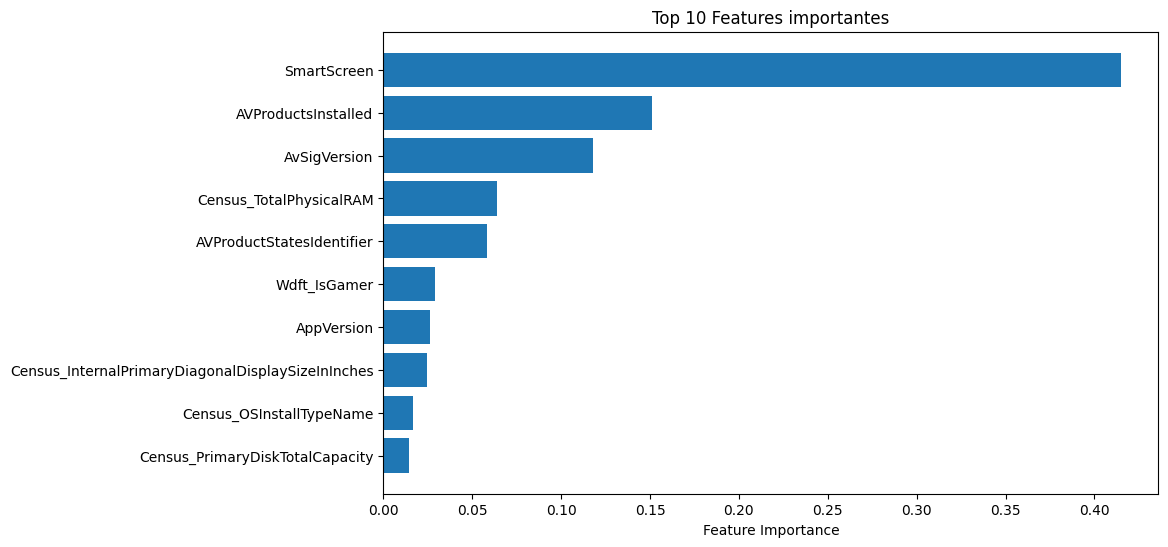

In [166]:
# Top 10 de variables y su importancia al hacer el modelo
sorted_idx = np.argsort(feature_importances)[-10:]
# Mostramos las 10 primeras variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features importantes')
plt.show()

In [167]:
from sklearn.tree import export_graphviz
# Generar datos en formato DOT para el árbol de decisión
dot_data = export_graphviz(
    decision_tree=modelo_final,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['No Malware', 'Malware'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)


In [168]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\nrankdir=LR ;\n0 [label="SmartScreen <= 3.5\\ngini = 0.5\\nsamples = 100.0%\\nvalue = [0.501, 0.499]\\nclass = No Malware", fillcolor="#fffffe"] ;\n1 [label="AvSigVersion <= 5544.5\\ngini = 0.32\\nsamples = 11.9%\\nvalue = [0.2, 0.8]\\nclass = Malware", fillcolor="#6bb6ec"] ;\n0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;\n2 [label="AVProductsInstalled <= 1.5\\ngini = 0.465\\nsamples = 1.9%\\nvalue = [0.368, 0.632]\\nclass = Malware", fillcolor="#acd6f4"] ;\n1 -> 2 ;\n3 [label="AVProductStatesIdentifier <= 61282.5\\ngini = 0.439\\nsamples = 1.2%\\nvalue = [0.325, 0.675]\\nclass = Malware", fillcolor="#98ccf2"] ;\n2 -> 3 ;\n4 [label="AppVersion <= 25.5\\ngini = 0.404\\nsamples = 0.9%\\nvalue = [0.281, 0.719]\\nclass = Malware", fillcolor="#86c3ef"] ;\n3 -> 4 ;\n5 [label="gini = 0.332\\nsamples = 0.3%\\nvalue = [0.21, 0.79]\\nclass = Malware", 

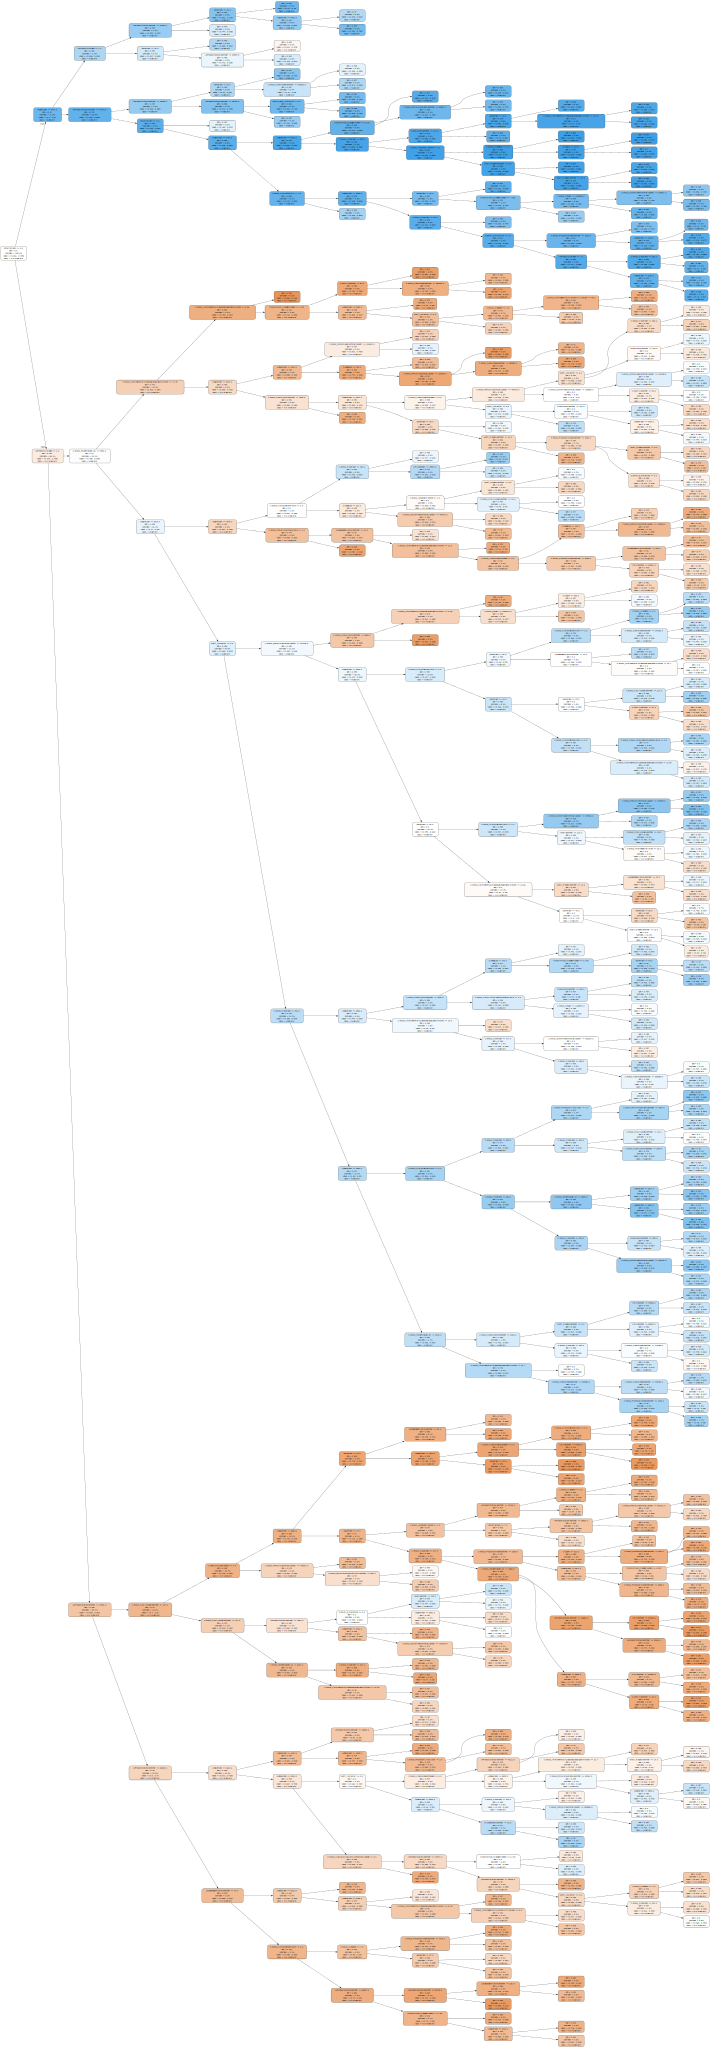

In [169]:
import graphviz
graphviz.Source(dot_data)


### Evaluacion

In [170]:
y_test_pred = pd.DataFrame(modelo_final.predict(X_test), index = y_test.index, columns = ['HasDetectionPrediction'])

In [171]:
results_df = y_test.join(y_test_pred, how = 'inner')

In [172]:
results_df.head(10)

HasDetections  HasDetectionPrediction
304897              1                       1
386541              0                       1
453817              1                       1
352553              1                       1
273259              1                       1
92632               1                       1
286766              0                       1
227245              0                       0
216696              0                       0
250260              0                       0

In [173]:
results_df['Success'] = (results_df['HasDetections'] == results_df['HasDetectionPrediction']).astype(int)

In [174]:
results_df['Success'].sum()

75258

In [175]:
results_df.head(10)

HasDetections  HasDetectionPrediction  Success
304897              1                       1        1
386541              0                       1        0
453817              1                       1        1
352553              1                       1        1
273259              1                       1        1
92632               1                       1        1
286766              0                       1        0
227245              0                       0        1
216696              0                       0        1
250260              0                       0        1

In [176]:
#accuracy

results_df['Success'].mean()

0.62715

In [177]:
#funcion directa
modelo_final.score(X_test,y_test)

0.62715

En nuestro caso, el 62.72% de las predicciones hechas por el modelo son correctas en relación con el conjunto de datos de prueba.

In [178]:
df2.describe().T

count          mean  \
AppVersion                                         500000.0  4.541745e+01   
AvSigVersion                                       500000.0  5.696972e+03   
AVProductStatesIdentifier                          500000.0  4.787260e+04   
AVProductsInstalled                                500000.0  1.325496e+00   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     500000.0  8.307753e+04   
OrganizationIdentifier                             500000.0  1.718199e+01   
GeoNameIdentifier                                  500000.0  1.697339e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsSuite                                            500000.0  5.747186e+02   
OsPlatformSubRelease                               500000.0  3.533676e+00   
OsBuildLab                                         500000.0  2.132045e+02   
SkuEdition                                         500000.0  4.707526e+00   
IsProtected                                        500000.0  9.459980e-01   
IeVerIdentifier                                    500000.0  1.267289e+02   
SmartScreen                                        500000.0  6.839238e+00   
Census_MDC2FormFactor                              500000.0  5.290374e+00   
Census_OEMNameIdentifier                           500000.0  2.223482e+03   
Census_OEMModelIdentifier                          500000.0  2.399864e+05   
Census_ProcessorCoreCount                          500000.0  3.994102e+00   
Census_ProcessorManufacturerIdentifier             500000.0  4.531280e+00   
Census_ProcessorModelIdentifier                    500000.0  2.372518e+03   
Census_PrimaryDiskTotalCapacity                    500000.0  5.138225e+05   
Census_PrimaryDiskTypeName                         500000.0  4.503860e-01   
Census_SystemVolumeTotalCapacity                   500000.0  3.759743e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            500000.0  6.110705e+03   
Census_ChassisTypeName                             500000.0  1.780619e+01   
Census_InternalPrimaryDiagonalDisplaySizeInInches  500000.0  1.668352e+01   
Census_PowerPlatformRoleName                       500000.0  2.778532e+00   
Census_InternalBatteryType                         500000.0  5.679034e+00   
Census_InternalBatteryNumberOfCharges              500000.0  1.091747e+09   
Census_OSVersion                                   500000.0  2.087748e+02   
Census_OSArchitecture                              500000.0  1.822320e-01   
Census_OSBranch                                    500000.0  4.195840e+00   
Census_OSEdition                                   500000.0  6.389480e+00   
Census_OSInstallTypeName                           500000.0  5.240882e+00   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_OSWUAutoUpdateOptionsName                   500000.0  2.994254e+00   
Census_GenuineStateName                            500000.0  9.387840e-01   
Census_ActivationChannel                           500000.0  1.302354e+00   
Census_FlightRing                                  500000.0  3.934064e+00   
Census_FirmwareManufacturerIdentifier              500000.0  3.972805e+02   
Census_FirmwareVersionIdentifier                   500000.0  3.303233e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsAlwaysOnAlwaysConnectedCapable            500000.0  5.678200e-02   
Wdft_IsGamer                                       500000.0  2.744300e-01   
Wdft_RegionIdentifier                              500000.0  7.960154e+00   
HasDetections                                      500000.0  4.999060e-01   
Census_Display                                     500000.0  1.459693e+06   
Transformed_OSBuildRevision                       

####Confusion Matrix

In [179]:
confusion_matrix = pd.crosstab(results_df['HasDetections'],results_df['HasDetectionPrediction'] )

In [180]:
confusion_matrix

HasDetectionPrediction      0      1
HasDetections                       
0                       34373  25525
1                       19217  40885

In [181]:
TP = 40885
TN = 34373
FP = 25525
FN = 19217

In [182]:
X_test.shape[0]

120000

In [183]:
round(TP/X_test.shape[0]*100,2)

34.07

En este caso, el 34,07% de todas las muestras que realmente son positivas fueron identificadas correctamente como positivas, sería recomendable aumentar el porcentaje de positivos debido a las necesidades del modelo y el target.

In [184]:
round(TN/X_test.shape[0]*100,2)

28.64

Nuestro modelo clasifica sobre todos los datos negativos del modelo, un 28,64% como correctamente como negativos. Para obtener un buen equilibrio entre la clasificación correcta entre negativas y positivas sería recomendable aumentar dicho modelo, por lo menos al porcentaje visto anteriormente.

In [185]:
round(FP/X_test.shape[0]*100,2)

21.27

Se representa la tasa de falsos positivos, la cual nos indica que nuestro modelo clasifica muestras negativas como positivas, de forma errónea en un 21,27%. Es recomendable una reducción de esta tasa debido al costo negativo sobre nuestro modelo de los falsos positivos.

#### F1 SCORE

In [186]:
F1_acc = (TP + TN) / (TP+FN+FP+TN)

In [187]:
#F1 accuracy , como porcentaje de acierto, tenemos una mejora por encima de 10 puntos con respecto al modelo inicial. Recordamos que la media aprox(50%)
F1_acc

0.62715

Aunque tenemos una mejora de 10 puntos sobre el modelo inicial; que nuestro modelo predice, ya sean positivas o negativas; un 62,72% son correctas en relación al tamaño del conjunto

In [188]:
Precision = TP / (TP + FP)

In [189]:
Recall = TP / (TP + FN)

In [190]:
F1 = (2/ (1/Precision + 1/ Recall))

In [191]:
#Media armónica de precisión y recall, proporcionando un equilibrio entre ambos.

#Indica que el modelo tiene un buen equilibrio entre precision y sensibilidad. Disminuye problemas de dataset balanceados
F1

0.6463418489945617

Esta métrica sugiere que nuestro modelo tiene un buen equilibrio entre la capacidad de identificar correctamente los casos positivos y evitar los falsos positivos, aunque siempre es recomendable alcanzar un score más alto.

In [192]:
#De todas las instancias positivas reales, ¿cuántas fueron identificadas por el modelo?
#
Recall

0.6802602242853815

Nuestro modelo tiene la capacidad de identificar correctamente como positivos reales un 68,03% de todos los casos positivos

In [193]:
#De todas las predicciones positivas, ¿cuántas eran correctas?,

Precision

0.6156452341514832

Nuestro modelo tiene capacidad clasificar las predicciones positivas un 61,56% como verdaderos positivos; por tanto, de todas las predicciones positivos el 61,56% son correctas. Es importante destarcar el equilibrio entre el recall y precisión.

In [194]:
metrics.f1_score(y_test, y_test_pred)

0.6463418489945617

In [195]:
#Es importante señalar que hay un compromiso entre precisión y recall. Aumentar la precisión puede reducir el recall y viceversa.
#Por eso, el F1 Score es útil para tener una visión equilibrada de ambos.

In [196]:
## Vemos que nuestros valores de Recall y Precision van muy a la par, balanceados uno con respecto al otro

#### Prediccion en forma probabilistica

In [197]:
#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "PredictionScore".
y_score = pd.DataFrame(modelo_final.predict_proba(X_test)[:,1], index = y_test.index, columns = ['PredictionScore'])

In [198]:
y_score

PredictionScore
304897         0.631145
386541         0.572477
453817         0.876231
352553         0.956627
273259         0.830018
...                 ...
102029         0.516167
88080          0.633030
455535         0.431002
297761         0.478833
26844          0.516167

[120000 rows x 1 columns]

In [199]:
results_df=results_df.join(y_score)

In [200]:
results_df.head()

HasDetections  HasDetectionPrediction  Success  PredictionScore
304897              1                       1        1         0.631145
386541              0                       1        0         0.572477
453817              1                       1        1         0.876231
352553              1                       1        1         0.956627
273259              1                       1        1         0.830018

In [201]:
 #Probaremos con un threshold de 0.35 para ver la variacion de los valores

 results_df['HasDetectionPrediction03']= (results_df['PredictionScore'] >= 0.35).astype(int)

In [202]:
results_df

HasDetections  HasDetectionPrediction  Success  PredictionScore  \
304897              1                       1        1         0.631145   
386541              0                       1        0         0.572477   
453817              1                       1        1         0.876231   
352553              1                       1        1         0.956627   
273259              1                       1        1         0.830018   
...               ...                     ...      ...              ...   
102029              0                       1        0         0.516167   
88080               1                       1        1         0.633030   
455535              0                       0        1         0.431002   
297761              0                       0        1         0.478833   
26844               0                       1        0         0.516167   

        HasDetectionPrediction03  
304897                         1  
386541                         1  
453817                         1  
352553                         1  
273259                         1  
...                          ...  
102029                         1  
88080                          1  
455535                         1  
297761                         1  
26844                          1  

[120000 rows x 5 columns]

In [203]:
results_df['Success03'] = (results_df[TARGET] == results_df['HasDetectionPrediction03']).astype(int)

In [204]:
results_df['Success03'].mean()

0.59285

Disminuyendo el threshold no vemos una mejora en nuestro modelo

#### ROC CURVE

In [205]:
#Claro, puedo calcular el False Positive Rate (FPR) y el True Positive Rate (TPR) utilizando los valores proporcionados previamente:
#FPR (FALSE POSITIVE RATE ):
#FPR = FP / (FP + TN) = 25,525 / (25,525 + 34,373) ≈ 0.4261
#TPR (TRUE POSITIVE RATE):
#TPR = TP / (TP + FN) = 40,885 / (40,885 + 19,217) ≈ 0.6802

In [206]:
FPR = FP / (FP + TN)

In [207]:
FPR

0.4261411065477979

In [208]:
TPR = TP / (TP + FN)

In [209]:
TPR

0.6802602242853815

FPR: alrededor del 42.56% de los casos negativos reales fueron incorrectamente clasificados como positivos por el modelo.
Mientras mas bajo mejor.. Es un numero aceptable en nuestro caso.
El TPR (True Positive Rate o Sensibilidad) es aproximadamente 0.6802, lo que indica que el modelo identifica correctamente alrededor del 68.07% de los casos positivos reales.
Esto sugiere que el modelo tiene una buena capacidad para identificar los casos positivos.

Podríamos decir que nuestro modelo , si es critico evitar los falsos positivos es un modelo "aceptable",
 (ya que prediga que el ordenador esta infectado pero en realidad no lo está, no genera tanto problema..)
pero si es esencial identificar correctamente los casos positivos, el TPR es sólido.. y creemos que es nuestro caso,
en el cual es esencial identificar los casos positivos para poder actuar con tiempo y eliminar el virus informático.

In [210]:
fpr, tpr, th = metrics.roc_curve(results_df[TARGET], results_df['PredictionScore'] )

Text(0, 0.5, 'TPR')

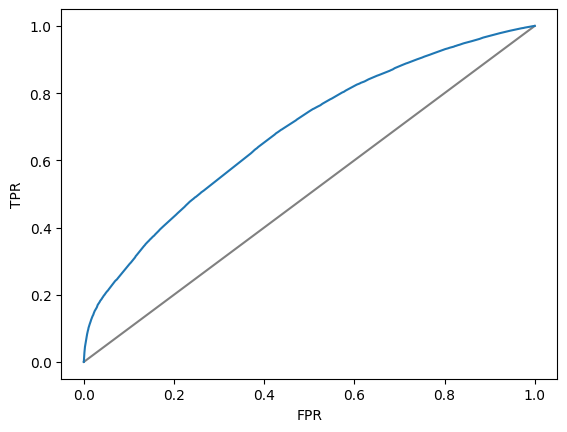

In [211]:
plt.plot([0,1], [0,1], color = 'grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [212]:
metrics.roc_auc_score(results_df[TARGET], results_df['PredictionScore'] )

0.6830929617775485

AUC de 0.68
Esta métrica indica que nuestro modelo tiene la capacidad de distinguir entre las dos clases de una forma razonable aunque tiene margen de mejora,, ya que sería recomendable que se acercase a 1.

Podemos decir que la gráfica es la esperada, sin presentar anormalidades.
Por otro lado podemos observar una roc curve del 0,68 , podríamos considerar un resultado aceptable, siento al menos de, 0,75 una muy buena métrica.

Podemos observar que  el TPR y el FPR no crecen a la misma velocidad
prediciendo positivos que en realidad no lo son.

### Modelos Alternativos

#### Random forest

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
rf_model = RandomForestClassifier(n_estimators = 100 , max_depth = 11, min_samples_leaf= 100)

In [215]:
rf_model.fit(X_train, y_train)

/tmp/ipykernel_26/223814155.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=11, min_samples_leaf=100)

In [216]:
#Aplicando Random Forest mejoramos nuestros valores obtenidos en nuestro modelo procesado con Decision Tree.
rf_model.score(val_df_X, val_df_y)

0.62963

#### Features Importance en Random Forest

In [217]:
# Obtenemos las importancias de las características
feature_importances = rf_model.feature_importances_
# Creamos un DataFrame para visualizar mejor las importancias
features_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': feature_importances
})
# Ordenamos el DataFrame en función de la importancia de las características
features_df = features_df.sort_values(by='Importance', ascending=False)
# Mostramos el DataFrame
features_df.head(64)

Features  Importance
15                                        SmartScreen    0.344787
3                                 AVProductsInstalled    0.118495
2                           AVProductStatesIdentifier    0.115213
1                                        AvSigVersion    0.074155
26                            Census_TotalPhysicalRAM    0.031898
0                                          AppVersion    0.027795
22                    Census_PrimaryDiskTotalCapacity    0.022042
28  Census_InternalPrimaryDiagonalDisplaySizeInInches    0.019732
47                                       Wdft_IsGamer    0.016319
33                              Census_OSArchitecture    0.013973
24                   Census_SystemVolumeTotalCapacity    0.012974
32                                   Census_OSVersion    0.011796
36                           Census_OSInstallTypeName    0.011262
19                          Census_ProcessorCoreCount    0.010797
21                    Census_ProcessorModelIdentifier    0.010723
51                                 Gamer_is_Protected    0.009053
11                                         OsBuildLab    0.008551
17                           Census_OEMNameIdentifier    0.008341
8                         LocaleEnglishNameIdentifier    0.008006
50                        Transformed_OSBuildRevision    0.007134
40                           Census_ActivationChannel    0.006922
46            Census_IsAlwaysOnAlwaysConnectedCapable    0.006694
14                                    IeVerIdentifier    0.006556
13                                        IsProtected    0.006475
48                              Wdft_RegionIdentifier    0.006140
4                                   CountryIdentifier    0.006091
18                          Census_OEMModelIdentifier    0.005859
49                                     Census_Display    0.005836
37                        Census_OSUILocaleIdentifier    0.005509
35                                   Census_OSEdition    0.005192
43                   Census_FirmwareVersionIdentifier    0.004991
29                       Census_PowerPlatformRoleName    0.004824
7                                   GeoNameIdentifier    0.004769
5                                      CityIdentifier    0.003950
34                                    Census_OSBranch    0.003765
27                             Census_ChassisTypeName    0.003658
10                               OsPlatformSubRelease    0.003337
42              Census_FirmwareManufacturerIdentifier    0.003085
45                              Census_IsTouchEnabled    0.003083
38                   Census_OSWUAutoUpdateOptionsName    0.002755
31              Census_InternalBatteryNumberOfCharges    0.002595
16                              Census_MDC2FormFactor    0.002319
23                         Census_PrimaryDiskTypeName    0.002251
44                         Census_IsSecureBootEnabled    0.001651
52                              Secure_Boot_Protected    0.001556
12                                         SkuEdition    0.001370
6                              OrganizationIdentifier    0.001186
39                            Census_GenuineStateName    0.001104
9                                             OsSuite    0.000985
25                         Census_HasOpticalDiskDrive    0.000956
30                         Census_InternalBatteryType    0.000920
41                                  Census_FlightRing    0.000301
20             Census_ProcessorManufacturerIdentifier    0.000269

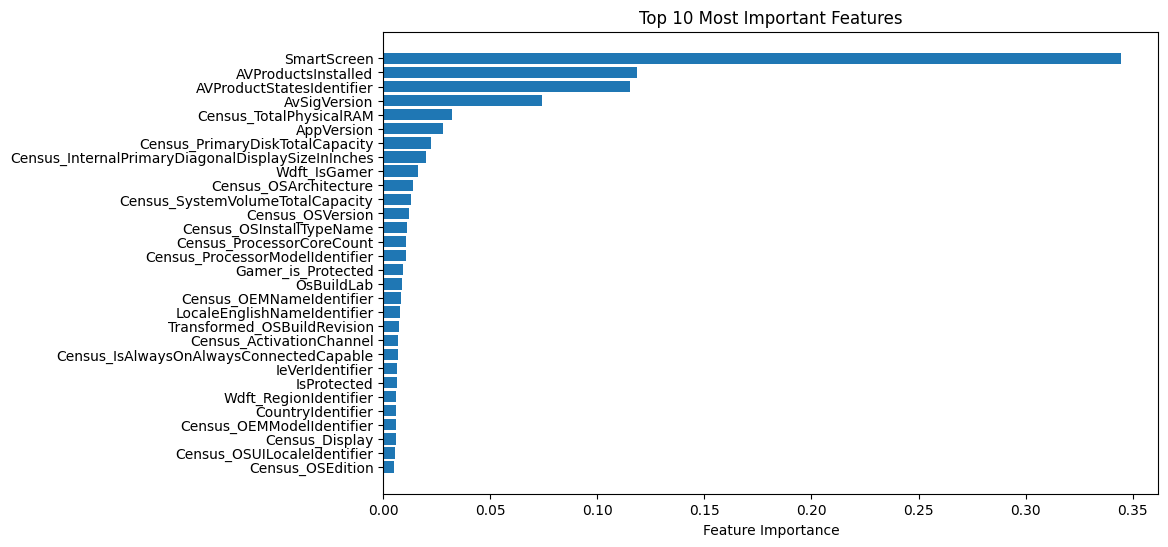

In [218]:
# Sort features by importance and select the top 30
sorted_idx = np.argsort(feature_importances)[-30:]
# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()

In [219]:
tree_list = rf_model.estimators_

In [220]:
tree_list[1]

DecisionTreeClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=100,
                       random_state=684741725)

In [221]:
tree_list[80]

DecisionTreeClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=100,
                       random_state=743115642)

In [222]:
dot_data_rf0 = export_graphviz(
    decision_tree = tree_list[1],
    out_file=None,
    feature_names=X_train.columns,
    class_names=['No Malware', 'Malware'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

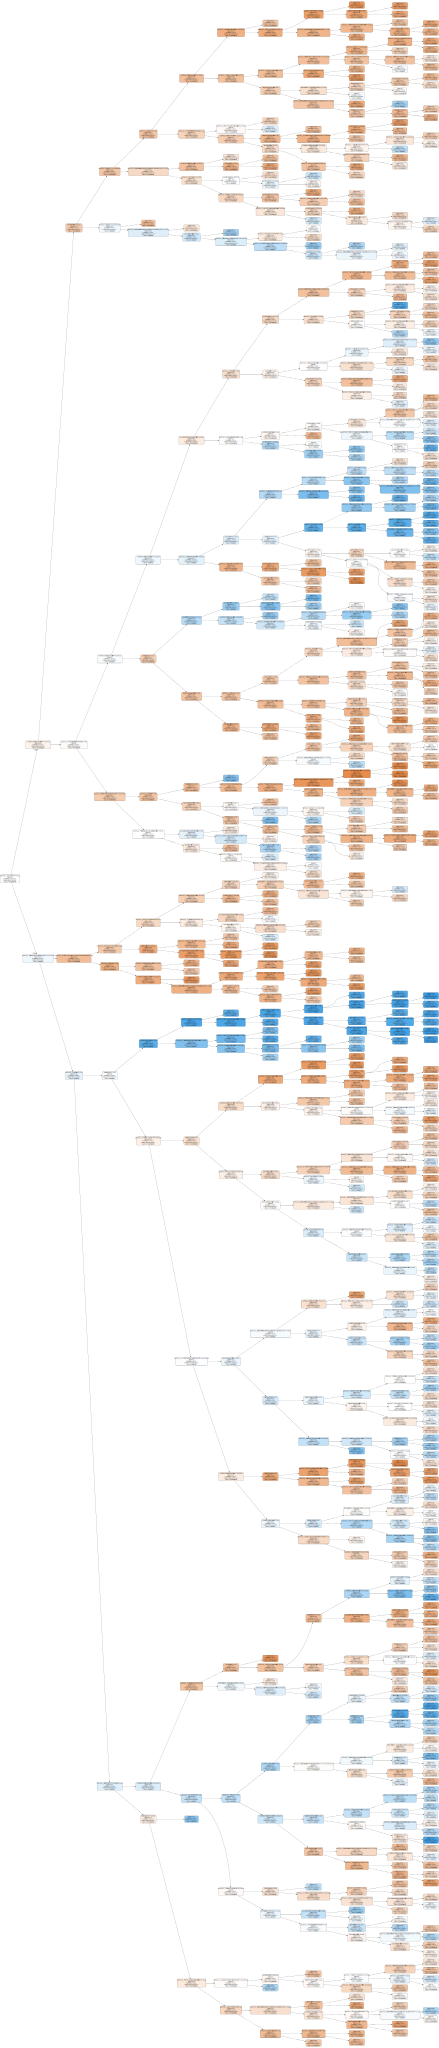

In [223]:
graphviz.Source(dot_data_rf0)

### Fin del analisis